# <center> $ Flight Price Prediction $ <center>

#### Dataset Description
#### Dataset
- it contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

##### FEATURES

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import datacleaner
from datacleaner import autoclean

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy import stats
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split #, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(300153, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [9]:
df.describe(include=object)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


## $Exploratory Data Analysis$

In [10]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

- We will drop column Unnamed: 0 as it is useless

In [11]:
for col in list(df.columns):
    print("\nfor column : ", col,"\n")
    print(df[col].value_counts())


for column :  airline 

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

for column :  flight 

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

for column :  source_city 

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

for column :  departure_time 

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

for column :  stops 

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

for column :  arrival_time 

Night            91538
Evening          78323
Morning        

<AxesSubplot: xlabel='price', ylabel='Count'>

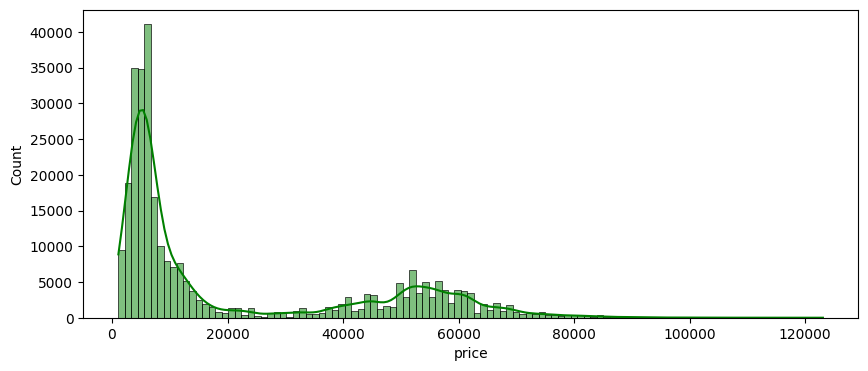

In [12]:
# Plotting the Ticket Prices with their respective counts

fig = plt.figure(figsize=(10,4))

sns.histplot(data=df, x='price', color="green", label="Airline", kde=True)

###### Q: Which airline is most used?

In [13]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

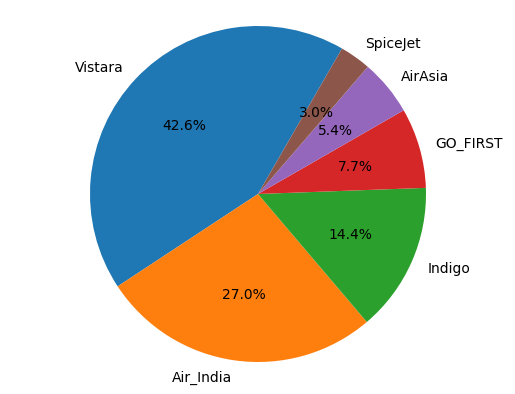

In [14]:
airline_counts = df['airline'].value_counts()
sizes = airline_counts.values
labels = airline_counts.index
plt.pie(x=sizes,labels=labels,autopct='%1.1f%%',startangle=60)
plt.axis('equal')
plt.show()

- We see that $Vistara$ airline is most used by 42.6%

###### Q: Which airline has most outcomes?

In [15]:
df.groupby('airline').sum().sort_values('price',ascending=False)[['price']]

,price
airline,
Vistara,3886470735
Air_India,1901529790
Indigo,229580207
GO_FIRST,130973972
AirAsia,65858089
SpiceJet,55681482


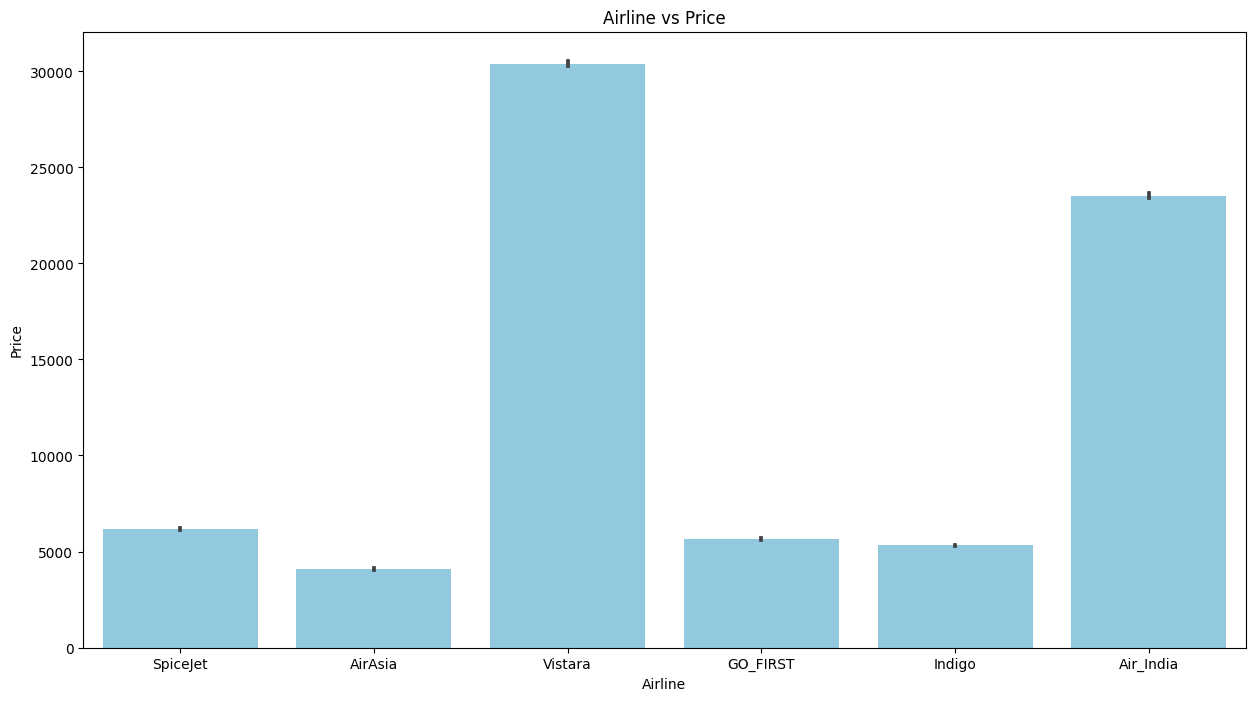

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x='airline', y='price', data=df,color='#87CEEB')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Airline vs Price')
plt.show()

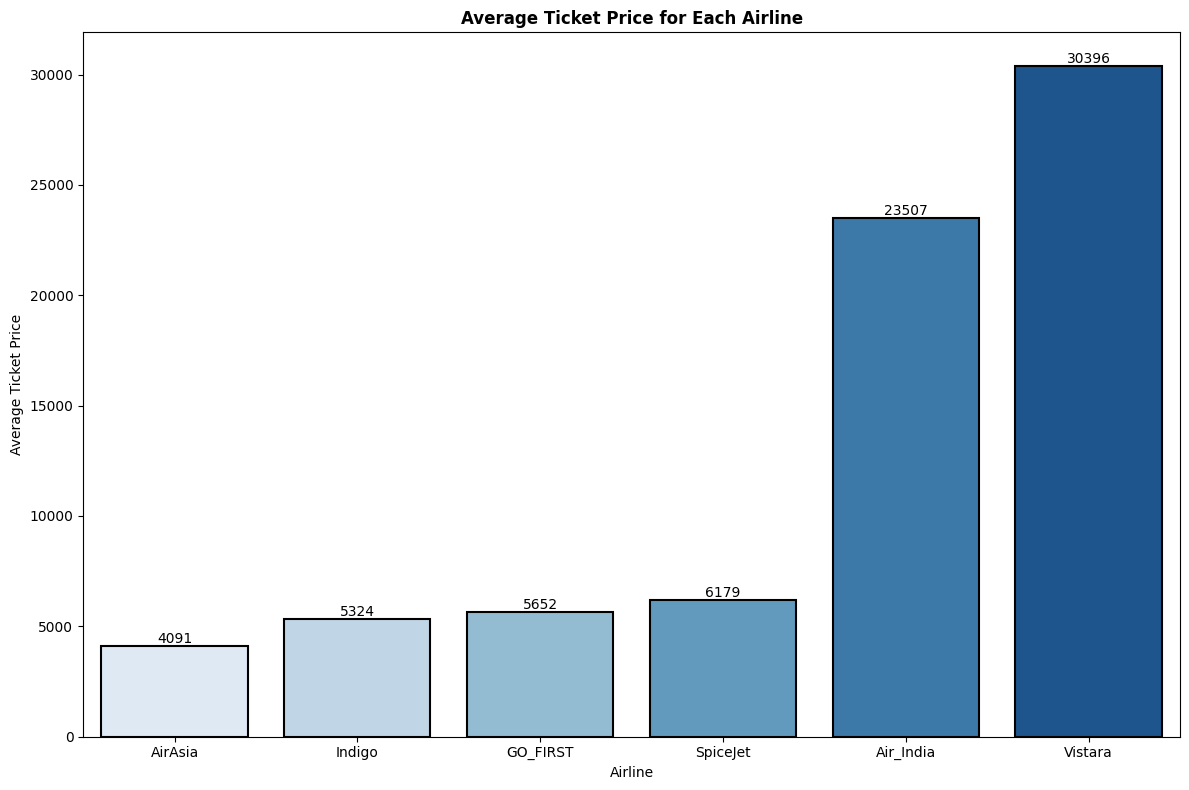

In [17]:
airline_group = df.groupby('airline')['price'].mean().reset_index()
airline_group['mean_price'] = airline_group['price'].astype(int)

airline_group = airline_group.sort_values(by='mean_price')

palette = sns.color_palette('Blues', n_colors=len(airline_group))

plt.figure(figsize=(12, 8))
p1 = sns.barplot(data=airline_group, x='airline', y='mean_price', palette=palette, linewidth=1.5, edgecolor='black')
p1.bar_label(p1.containers[0])

plt.title('Average Ticket Price for Each Airline', fontweight='bold')
plt.xlabel('Airline')
plt.ylabel('Average Ticket Price')

plt.tight_layout()
plt.show()

- From above charts we conclude that $Vistara$ has most outcomes as it also has most clients.
- Although $SpiceJet$ has the least client but its outcome is the third in order that is because its tickets are expensive from others.

- Out of all the airlines, $Vistara$ and $Air India$ offer the most expensive tickets, with $Vistara$ taking the lead.
- However, if you're looking for more budget-friendly options, $AirAsia$ provides the cheapest tickets among all the airlines.

###### Q: What is the most airline used in economy class and who has the most outcomes?

In [18]:
economy = df[df['class'] == 'Economy']
economy['airline'].value_counts()

Vistara      67270
Air_India    47994
Indigo       43120
GO_FIRST     23173
AirAsia      16098
SpiceJet      9011
Name: airline, dtype: int64

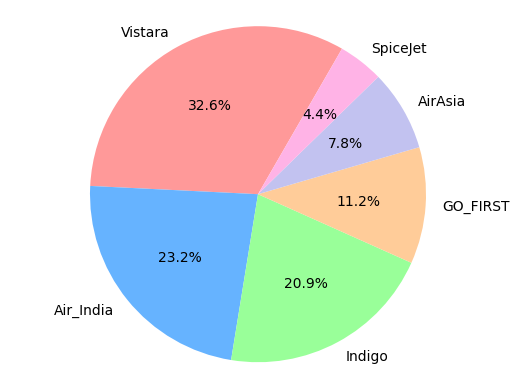

In [19]:
airline_counts = economy['airline'].value_counts()
sizes = airline_counts.values
labels = airline_counts.index
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
plt.pie(x=sizes,labels=labels,autopct='%1.1f%%',startangle=60,colors=colors)
plt.axis('equal')
plt.show()

In [20]:
economy.groupby('airline').sum().sort_values('price',ascending=False)[['price']]

,price
airline,
Vistara,525173099
Air_India,351012862
Indigo,229580207
GO_FIRST,130973972
AirAsia,65858089
SpiceJet,55681482


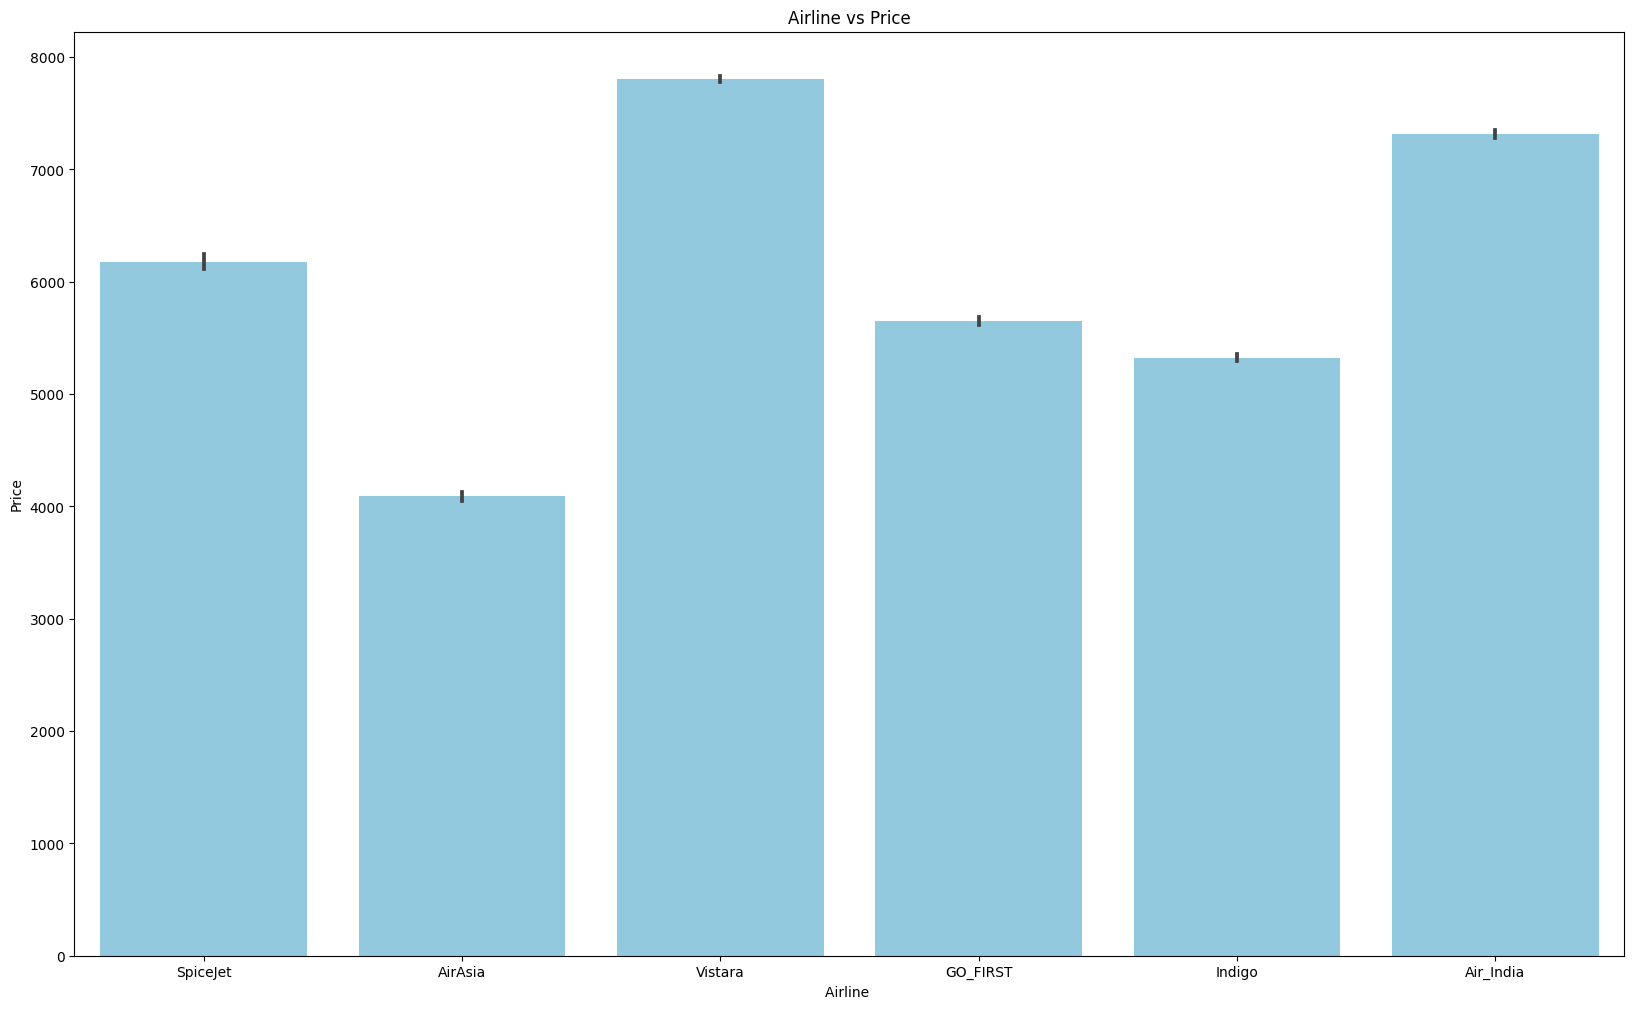

In [21]:
plt.figure(figsize=(20,12))
sns.barplot(x='airline', y='price', data=economy,color='#87CEEB')
plt.xlabel('Airline ')
plt.ylabel('Price')
plt.title('Airline vs Price')
plt.show()

- Also $Vistara$ has most clients and outcomes, $SpiceJet$ , $AirAsia$ , $Gofirst$ and $Indigo$ has only economic tickets as count of economy tickets equal to whole of Its tickets

###### Q: What is the most airline used in Buisness class and who has the most outcomes?

In [22]:
buisness = df[df['class'] == 'Business']
buisness['airline'].value_counts()

Vistara      60589
Air_India    32898
Name: airline, dtype: int64

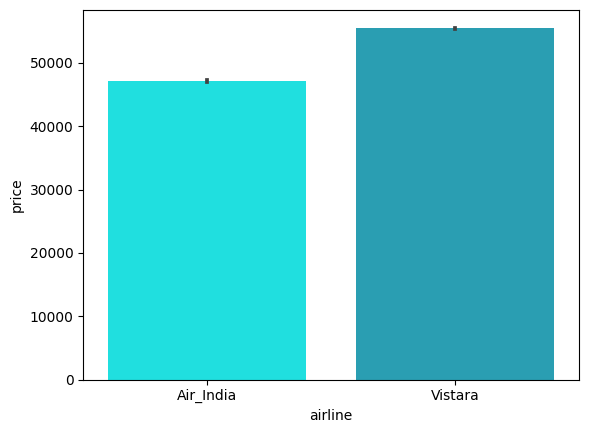

In [23]:
sns.barplot(data = buisness,x='airline',y='price',palette=['#00FFFF','#13AEC9'])
plt.show()

In [24]:
buisness.groupby('airline').mean().sort_values('price',ascending=False)[['price']]

,price
airline,
Vistara,55477.027777
Air_India,47131.039212


- Also $Vistara$ complete its dominance over most clients and most outcomes.
- As we say before $Vistara$ and $Air_india$ only airlines that has buisness tickets

###### Q: Which is the most cities clients has gone from it?

In [25]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [26]:
df['source_city'].mode()

0    Delhi
Name: source_city, dtype: object

In [27]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [28]:
df['destination_city'].mode()

0    Mumbai
Name: destination_city, dtype: object

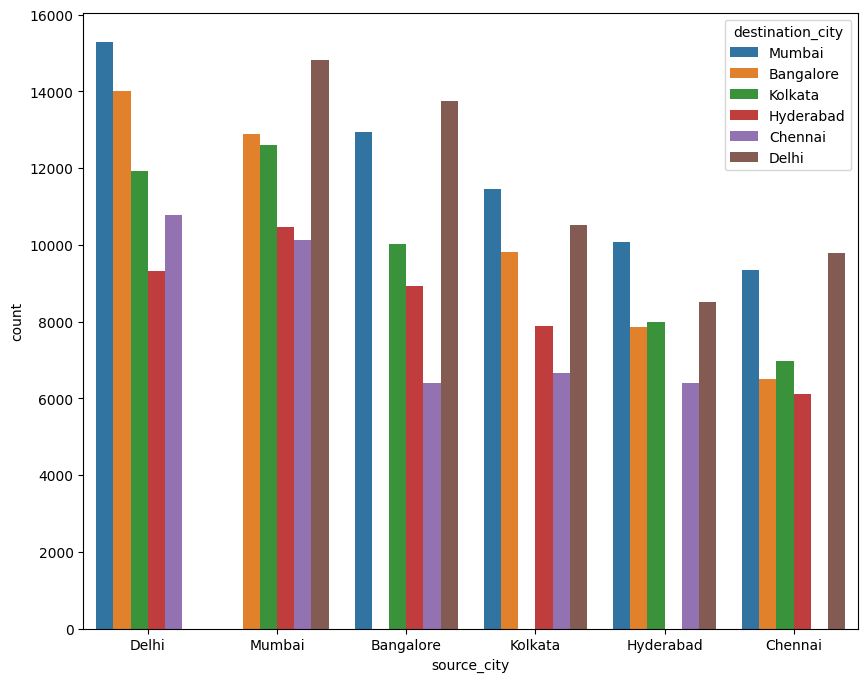

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['source_city'],hue=df['destination_city'])
plt.show()

In [30]:
df['source_to_destination'] = df['source_city'].str.cat(df['destination_city'],sep=' to ')
df['source_to_destination'].unique()

array(['Delhi to Mumbai', 'Delhi to Bangalore', 'Delhi to Kolkata',
       'Delhi to Hyderabad', 'Delhi to Chennai', 'Mumbai to Delhi',
       'Mumbai to Bangalore', 'Mumbai to Kolkata', 'Mumbai to Hyderabad',
       'Mumbai to Chennai', 'Bangalore to Delhi', 'Bangalore to Mumbai',
       'Bangalore to Kolkata', 'Bangalore to Hyderabad',
       'Bangalore to Chennai', 'Kolkata to Delhi', 'Kolkata to Mumbai',
       'Kolkata to Bangalore', 'Kolkata to Hyderabad',
       'Kolkata to Chennai', 'Hyderabad to Delhi', 'Hyderabad to Mumbai',
       'Hyderabad to Bangalore', 'Hyderabad to Kolkata',
       'Hyderabad to Chennai', 'Chennai to Delhi', 'Chennai to Mumbai',
       'Chennai to Bangalore', 'Chennai to Kolkata',
       'Chennai to Hyderabad'], dtype=object)

In [31]:
df['source_to_destination'].mode()

0    Delhi to Mumbai
Name: source_to_destination, dtype: object

- From above We can see that, 'Delhi to Mumbai' is the most flight that is clients used it.
- Also we see that most destination city is 'Mumbai' and most source city is 'Delhi'.

###### Q: Which flight has most outcome?

In [32]:
df.groupby('source_to_destination').mean().sort_values('price',ascending = False)[['price','duration']]

,price,duration
source_to_destination,,
Chennai to Bangalore,25081.850454,13.952594
Kolkata to Chennai,23660.361040,14.774182
Bangalore to Kolkata,23500.061229,13.099143
Bangalore to Chennai,23321.850078,14.480207
Mumbai to Bangalore,23147.873807,11.612023
Bangalore to Mumbai,23128.618672,10.905072
Mumbai to Chennai,22781.899112,12.665900
Chennai to Mumbai,22765.849647,12.374656
Kolkata to Bangalore,22744.808428,13.792947


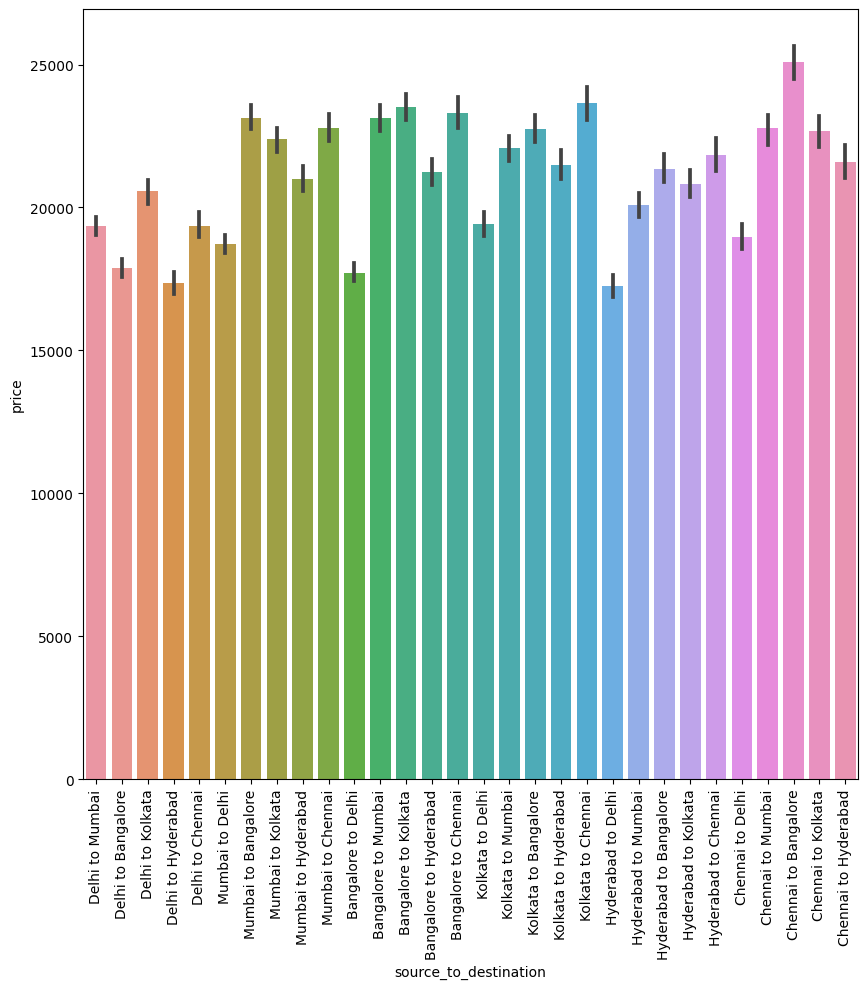

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='source_to_destination', y='price')
plt.xticks(rotation = 90)
plt.show()

- Chennai to Bangalore has most outcome as a flight

##### Q: Which is the most airlines used in each city?

In [34]:
airline_counts = df.groupby(['source_to_destination', 'airline']).size().reset_index(name='count').sort_values('count'
                                                                                                            ,ascending = False)
airline_counts

,source_to_destination,airline,count
89,Delhi to Mumbai,Vistara,5840
165,Mumbai to Delhi,Vistara,5812
11,Bangalore to Delhi,Vistara,5423
29,Bangalore to Mumbai,Vistara,5380
65,Delhi to Bangalore,Vistara,5379
...,...,...,...
46,Chennai to Hyderabad,SpiceJet,51
44,Chennai to Hyderabad,GO_FIRST,38
97,Hyderabad to Chennai,GO_FIRST,38
16,Bangalore to Hyderabad,SpiceJet,31


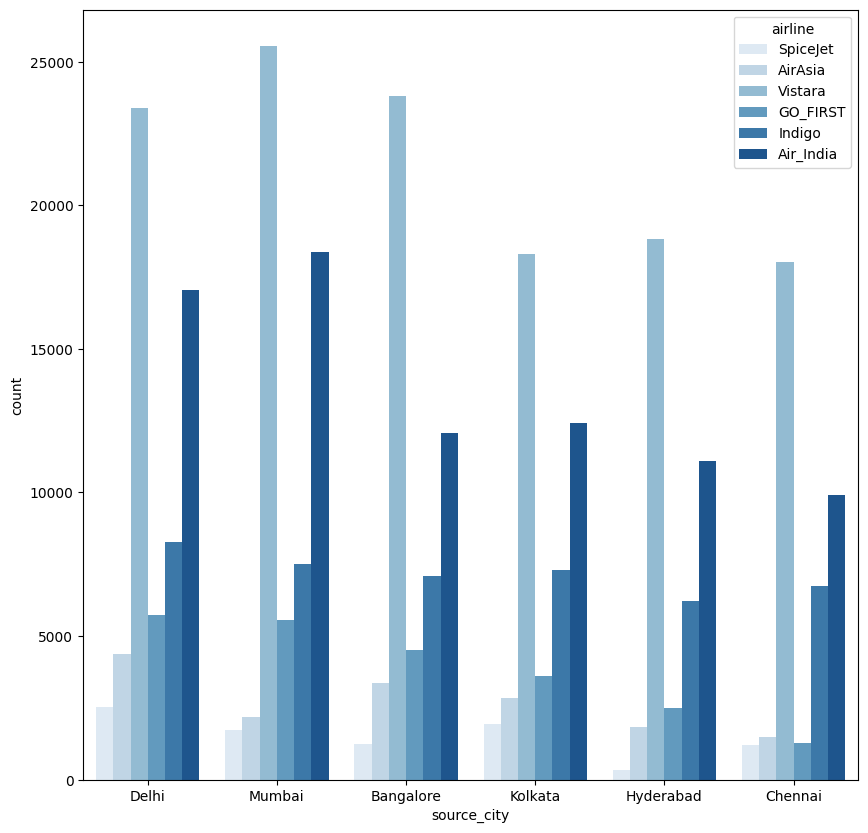

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(data = df,x='source_city',hue = 'airline',palette = 'Blues')
plt.show()

- We notice a large dominance of Vistara over all cities, Air India comes always after it.
- In delhi we see that the most usage off all of airlines.

###### Q: Which city is most used in economic tickets?

In [36]:
economy['source_city'].value_counts()

Delhi        43027
Mumbai       41038
Bangalore    35620
Kolkata      32874
Hyderabad    27936
Chennai      26171
Name: source_city, dtype: int64

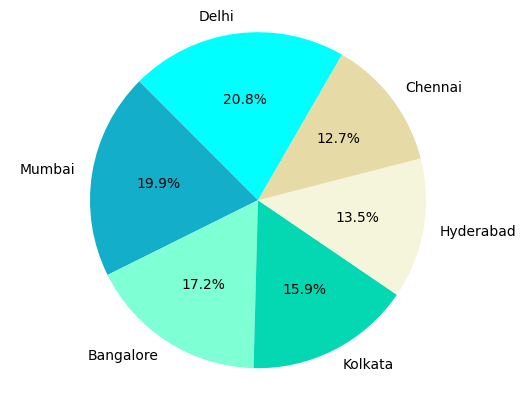

In [37]:
city_counts = economy['source_city'].value_counts()
sizes = city_counts.values
labels = city_counts.index
colors = ['#00FFFF','#13AEC9','#7FFFD4','#04D8B2','#F5F5DC','#E6DAA6']
plt.pie(x=sizes,labels=labels,autopct='%1.1f%%',startangle=60,colors=colors)
plt.axis('equal')
plt.show()

- There is a simple difference between Delhi and Mumbai in economic tickets that comes in first position and mumbai comes in the second one.

###### Q: Which city has most buisness tickets?

In [38]:
buisness['source_city'].value_counts()

Mumbai       19858
Delhi        18316
Bangalore    16441
Kolkata      13473
Hyderabad    12870
Chennai      12529
Name: source_city, dtype: int64

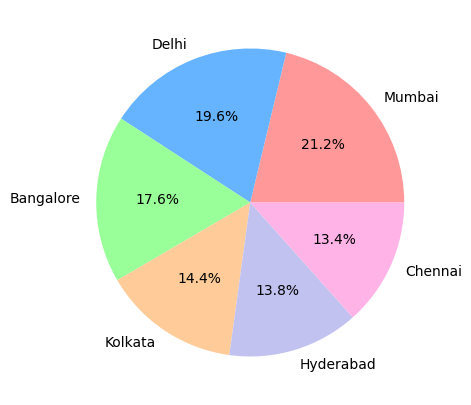

In [39]:
plt.figure(figsize=(5,5))
city_counts = buisness['source_city'].value_counts()
sizes = city_counts.values
labels = city_counts.index
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)

plt.show()

- Mumbai comes in the first position and delhi in second one that has most buisness tickets opposite to the economic tickets.

###### Q: What is the effect of duraion of flight on its price?

In [40]:
df.groupby('class').mean().sort_values('price',ascending=False)[['duration','price']]

,duration,price
class,,
Business,13.704274,52540.081124
Economy,11.550060,6572.342383


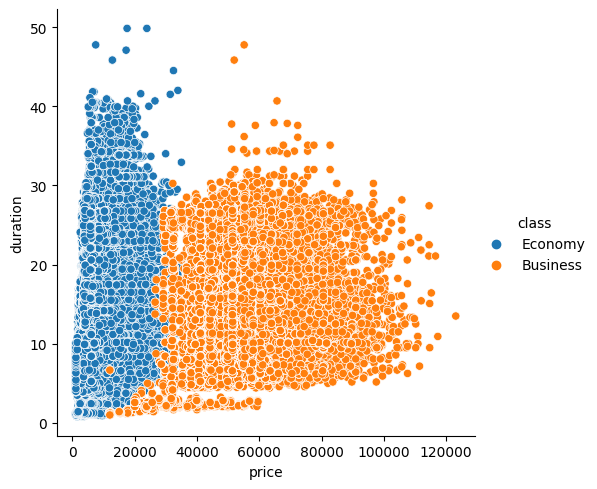

In [41]:
sns.relplot(data = df,x = 'price',y = 'duration',kind = 'scatter',hue = 'class')

###### Q: What is the average duration and which flight has maximum duration?

In [42]:
flight_duration = df.groupby('source_to_destination').mean().sort_values('duration',ascending = False)['duration']
flight_duration

source_to_destination
Kolkata to Chennai        14.774182
Chennai to Kolkata        14.515774
Bangalore to Chennai      14.480207
Bangalore to Hyderabad    14.162433
Chennai to Bangalore      13.952594
Kolkata to Hyderabad      13.853108
Kolkata to Bangalore      13.792947
Hyderabad to Kolkata      13.535322
Hyderabad to Chennai      13.293238
Mumbai to Hyderabad       13.263310
Chennai to Hyderabad      13.153985
Bangalore to Kolkata      13.099143
Kolkata to Mumbai         12.991933
Mumbai to Kolkata         12.836848
Delhi to Kolkata          12.735966
Mumbai to Chennai         12.665900
Delhi to Hyderabad        12.518350
Delhi to Chennai          12.433965
Chennai to Mumbai         12.374656
Hyderabad to Bangalore    12.093317
Hyderabad to Mumbai       11.962923
Mumbai to Bangalore       11.612023
Kolkata to Delhi          11.604989
Chennai to Delhi          11.149374
Bangalore to Mumbai       10.905072
Hyderabad to Delhi        10.829817
Delhi to Mumbai           10.367774
Delhi 

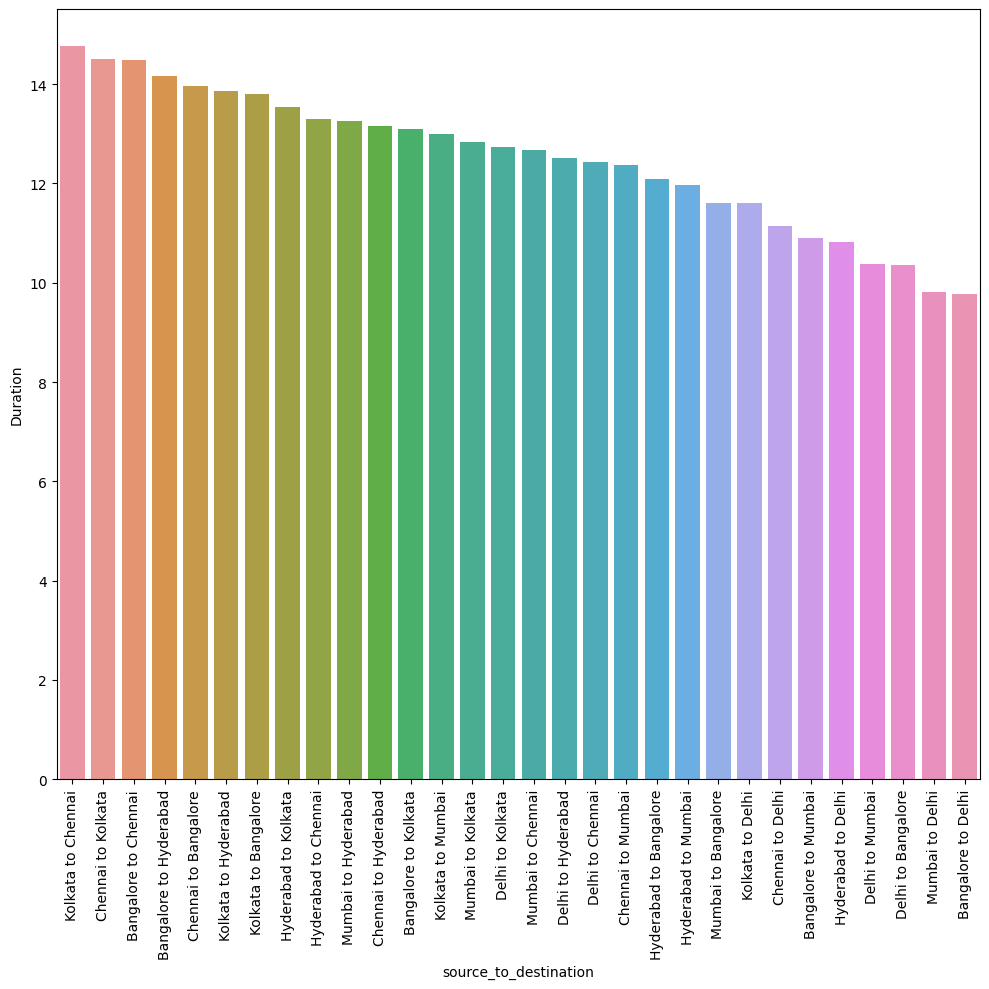

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(x=flight_duration.index,y=flight_duration.values)
plt.xticks(rotation=90)
plt.ylabel('Duration')
plt.tight_layout()
plt.show()

- Kolkata to Chennai flight has the most duration time

##### Q: How much airplane has stops in its flights and what is the maximum of stops of flights?

In [44]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

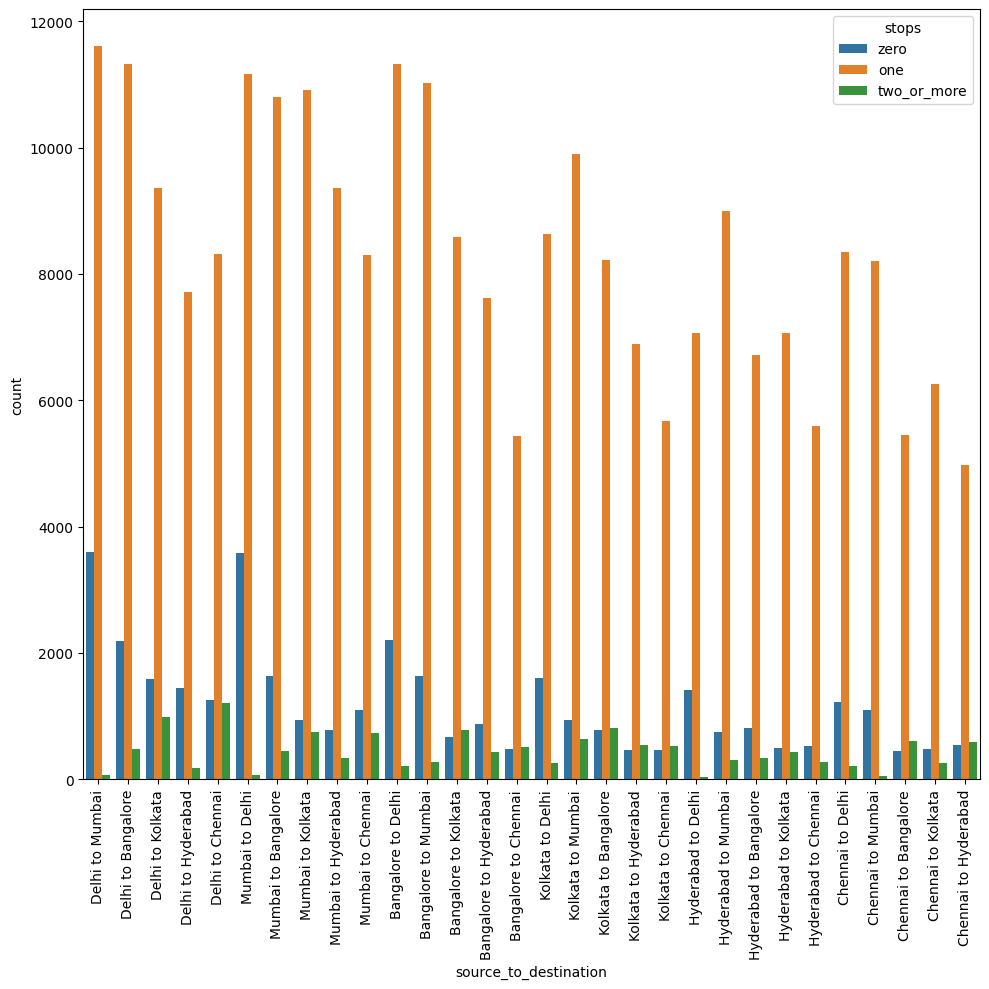

In [45]:
plt.figure(figsize=(10,10))
colors = sns.color_palette("tab10")
sns.countplot(x=df['source_to_destination'],hue = df['stops'],palette = colors)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- As chart above shows, one stop has been used as maximum in all flights

###### Q: How is the price affected when tickets are bought in just 1 or 2 days before departure?

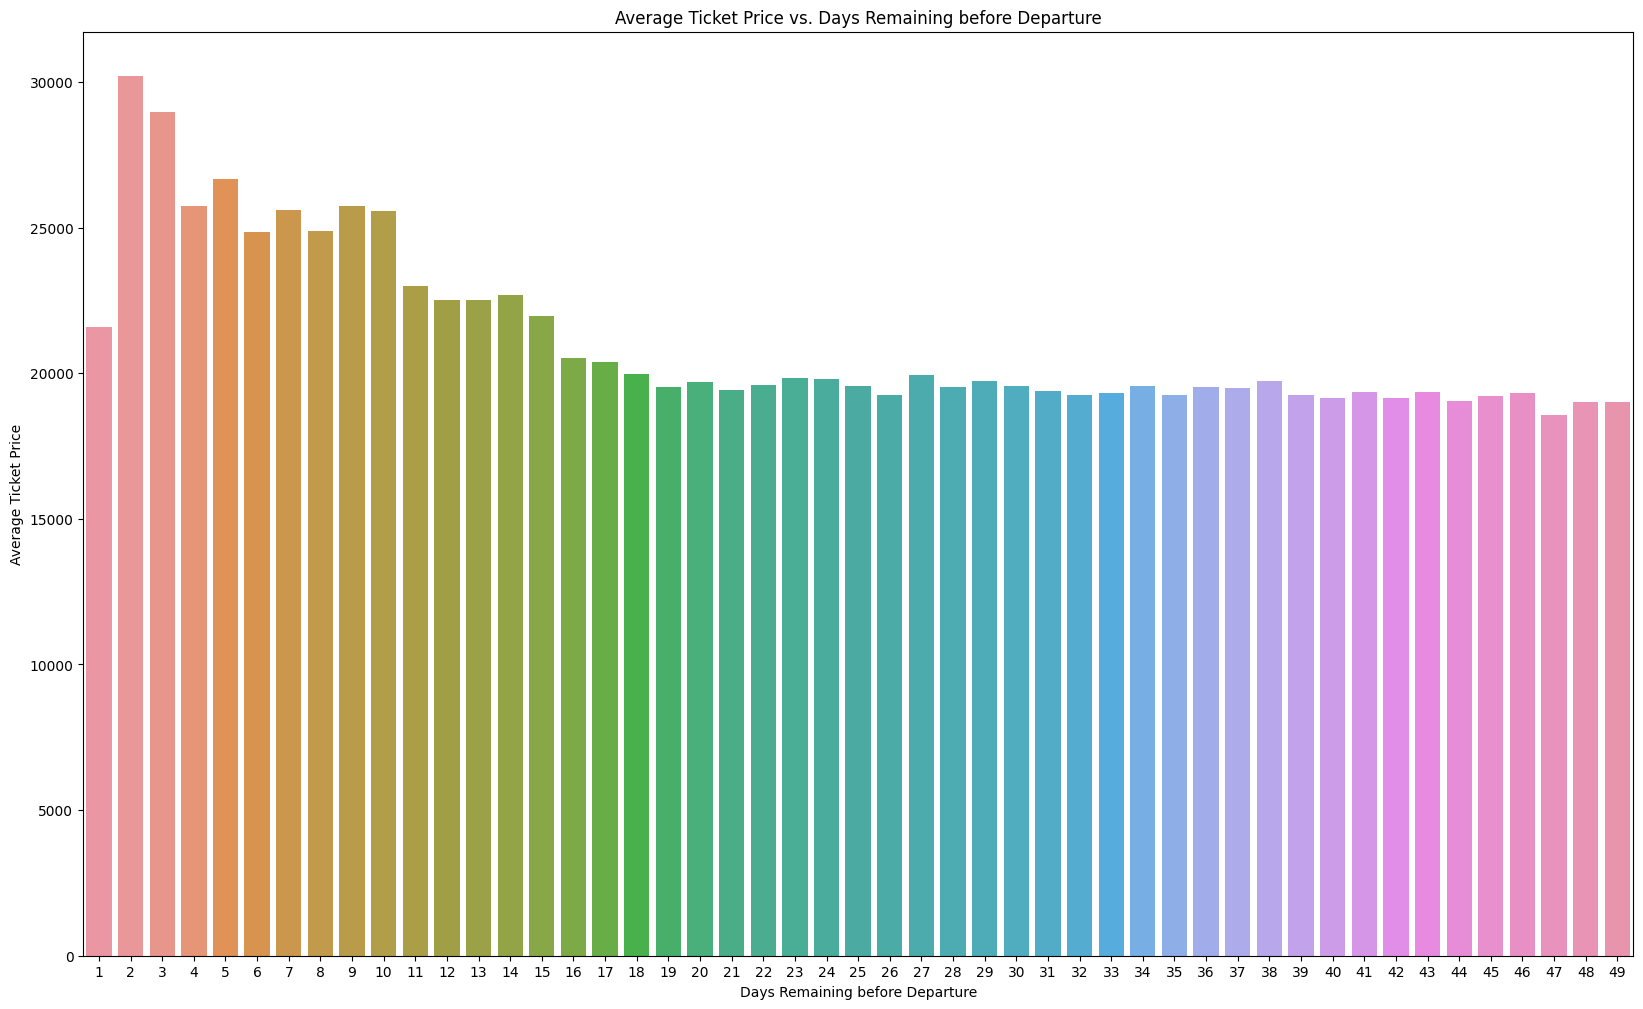

Figure(2000x1200) AxesSubplot(0.125,0.11;0.775x0.77) Text(0.5, 23.999999999999993, 'Days Remaining before Departure') Text(24.000000000000014, 0.5, 'Average Ticket Price') Text(0.5, 1.0, 'Average Ticket Price vs. Days Remaining before Departure') None


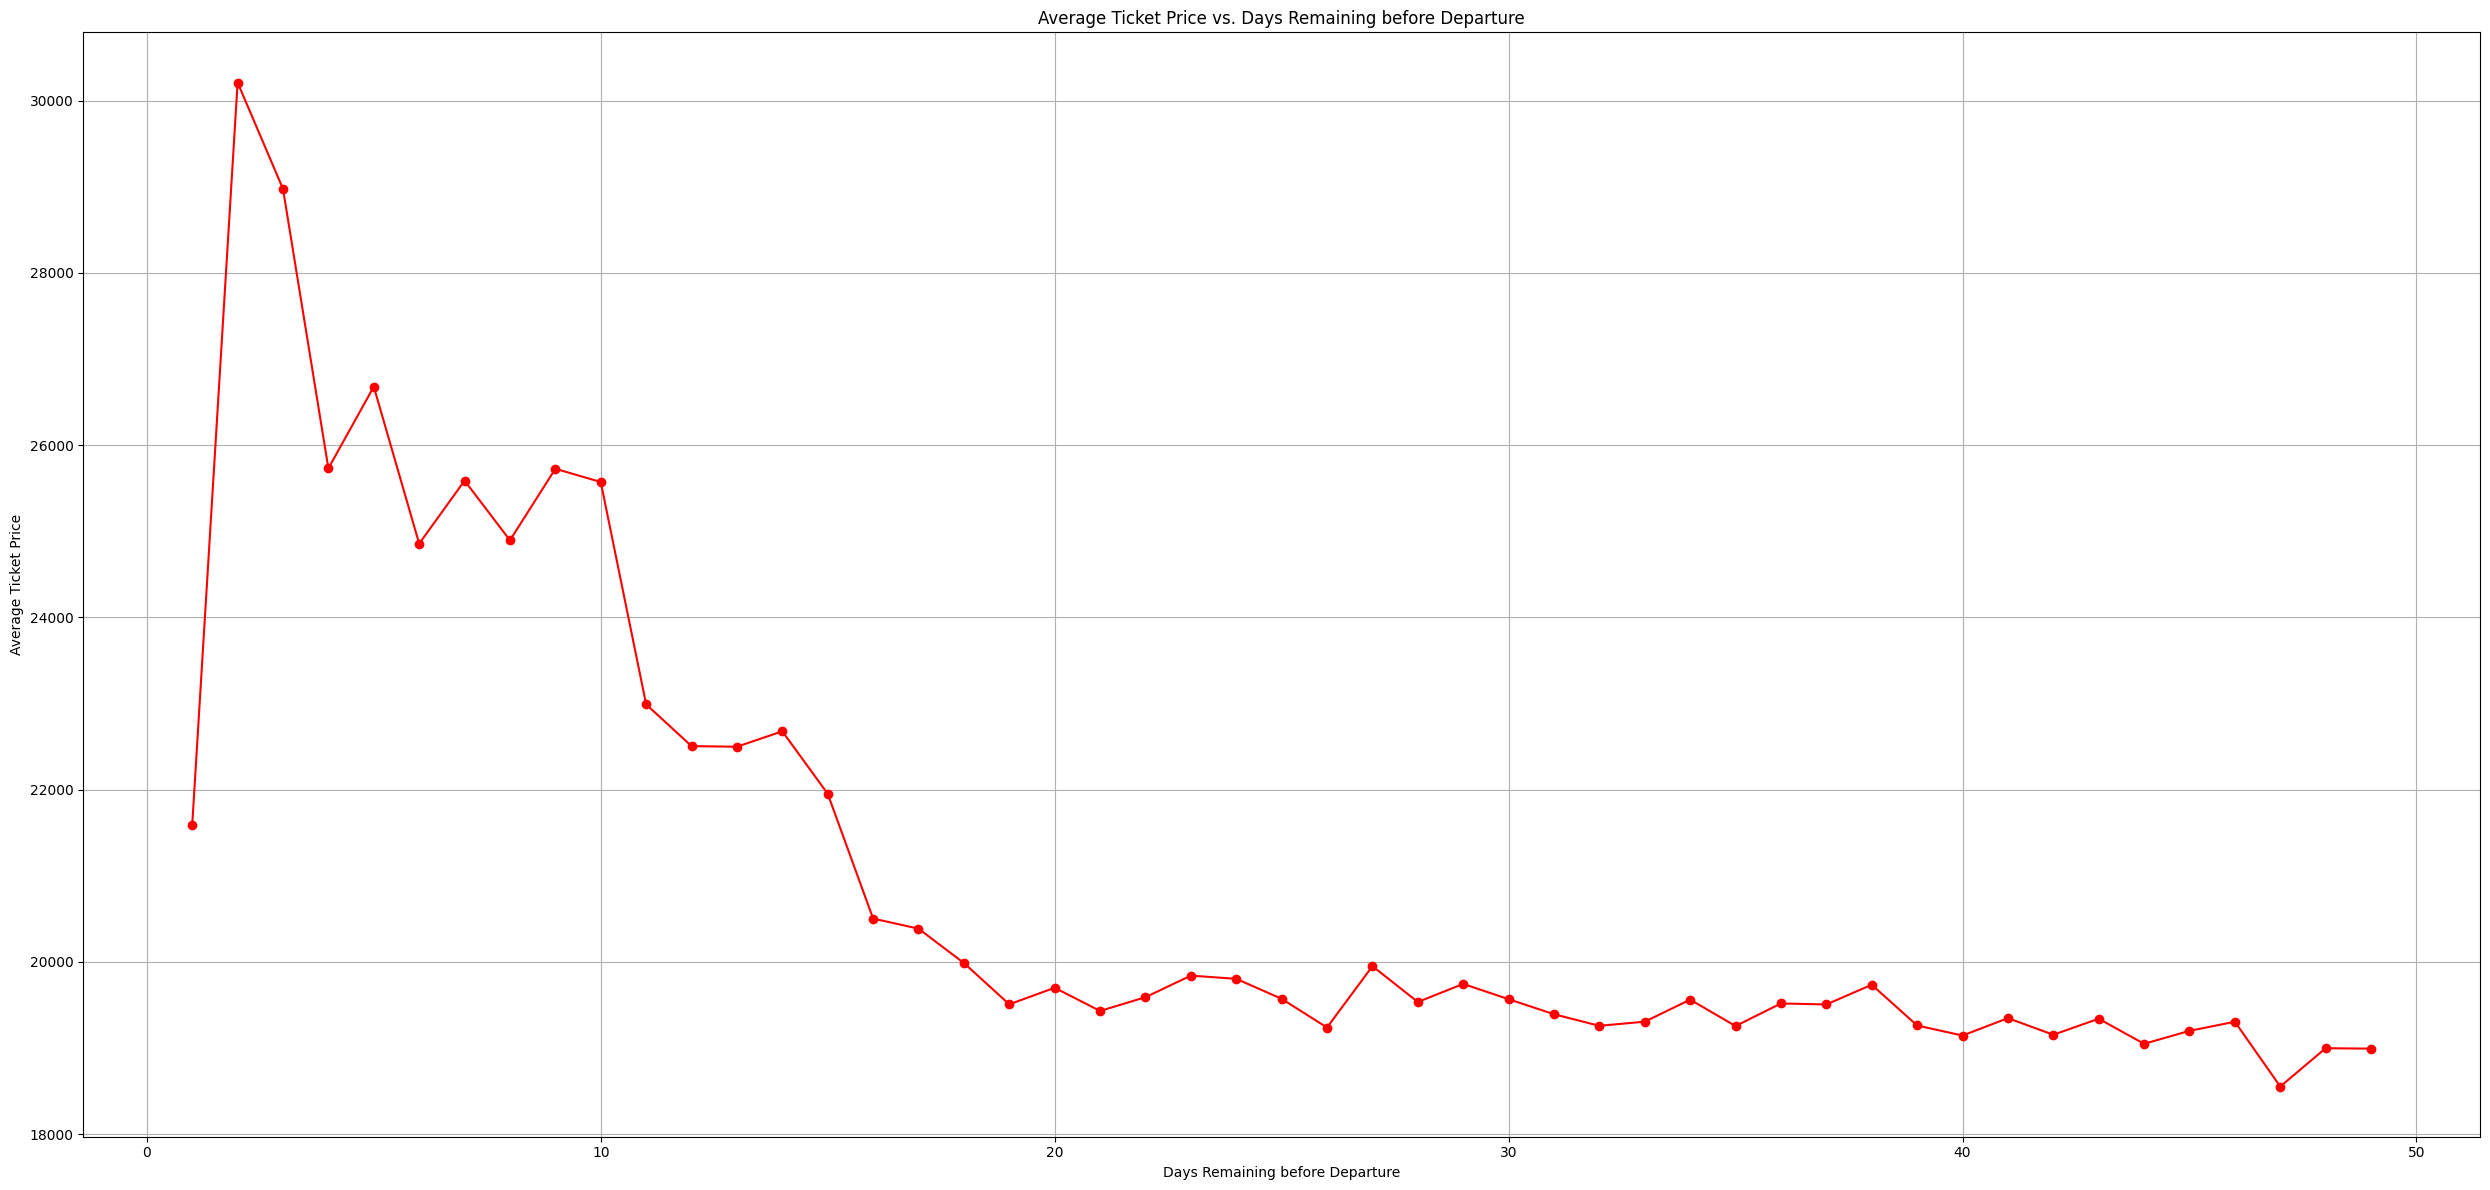

In [46]:
average_prices = df.groupby('days_left')['price'].mean().reset_index()

print(plt.figure(figsize=(20,12)),
      sns.barplot(x='days_left', y='price', data=average_prices),
      plt.xlabel('Days Remaining before Departure'),
      plt.ylabel('Average Ticket Price'),
      plt.title('Average Ticket Price vs. Days Remaining before Departure'),
      plt.show())

plt.figure(figsize=(25,12))
plt.plot(average_prices['days_left'], average_prices['price'], marker='o', color='red')
plt.xlabel('Days Remaining before Departure')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price vs. Days Remaining before Departure')
plt.grid(True)

plt.tight_layout()
plt.show()

- Ticket prices for a flight follow a $Uniform distribution$ between the 18th and 49th day before departure.
- However, the most expensive tickets are found closer to the departure date, with the highest price being charged just two days before the flight. 
- This means that as the departure day approaches, ticket prices increase significantly, making last-minute bookings much more costly. 
- It's essential for travelers to be aware of this price trend and plan accordingly to avoid paying a premium for their flights.
- However, there is a twist: if you book just one day before the flight, you can get a cheaper ticket than if you book two days before the flight. 

- This could be because the airlines may hold some of the cheapest tickets until the last day, resulting in limited choices for travelers. So, for those willing to take the risk and wait until the last minute, there's a potential opportunity to snag a better deal.

###### Q: How does the price change depending on the departure time?

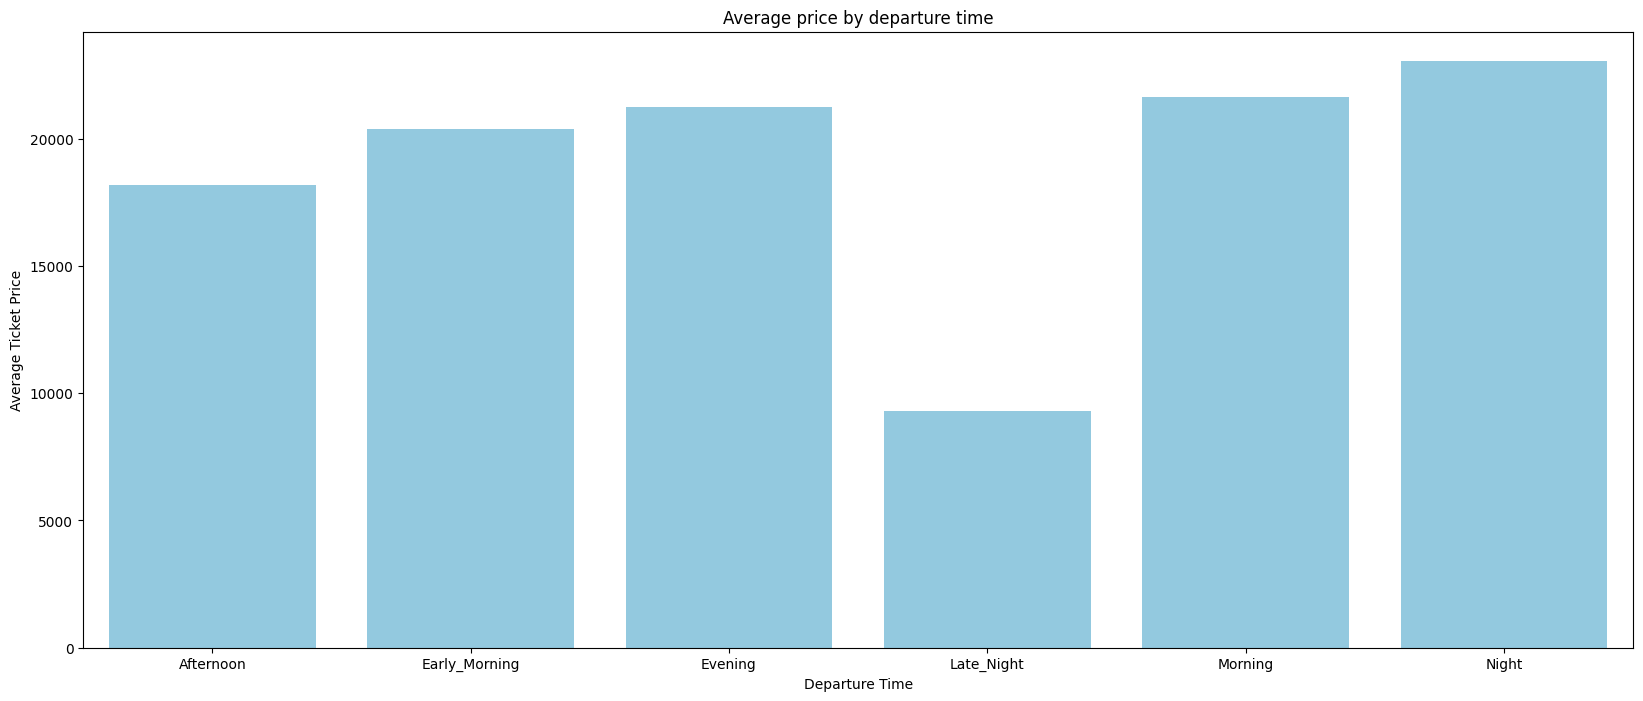

Figure(2000x800) AxesSubplot(0.125,0.11;0.775x0.77) Text(0.5, 24.0, 'Departure Time') Text(24.000000000000014, 0.5, 'Average Ticket Price') Text(0.5, 1.0, 'Average price by departure time') None


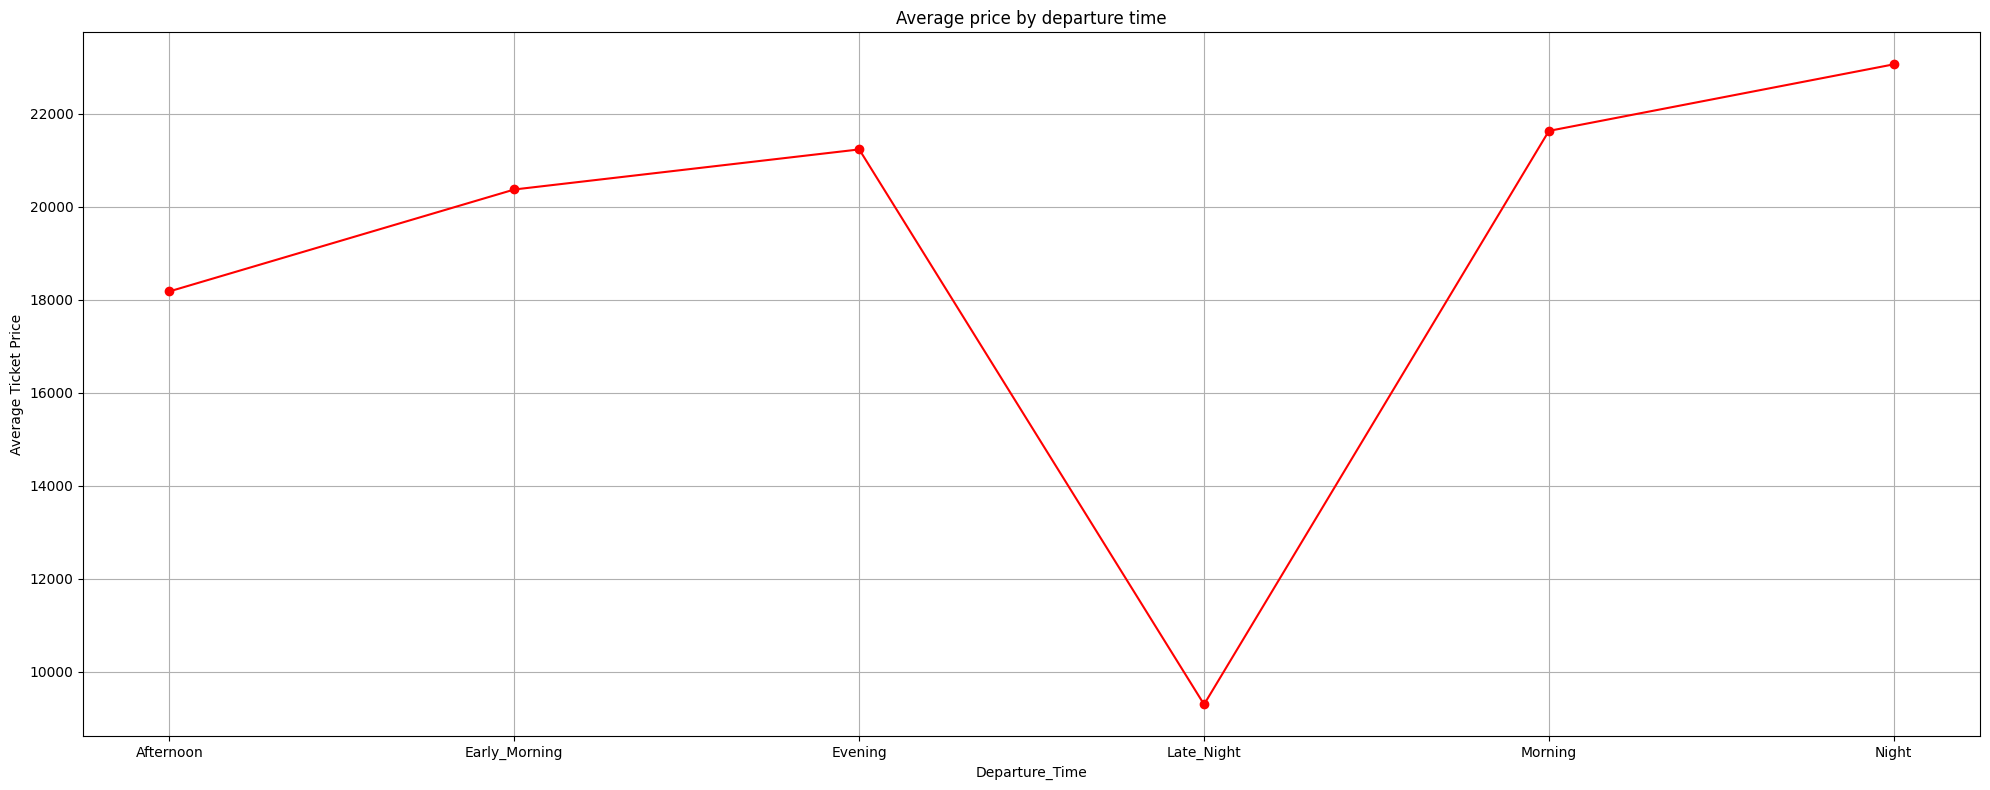

In [47]:
average_prices1 = df.groupby('departure_time')['price'].mean().reset_index()

print(plt.figure(figsize=(20,8)),
      sns.barplot(x='departure_time', y='price', data=average_prices1,color='#87CEEB'),
      plt.xlabel('Departure Time'),
      plt.ylabel('Average Ticket Price'),
      plt.title('Average price by departure time'),
      plt.show())

plt.figure(figsize=(20,8))
plt.plot(average_prices1['departure_time'], average_prices1['price'], marker='o', color='red')
plt.xlabel('Departure_Time')
plt.ylabel('Average Ticket Price')
plt.title('Average price by departure time')
plt.grid(True)

plt.tight_layout()
plt.show()

In [48]:
print(average_prices1)

  departure_time         price
0      Afternoon  18179.203331
1  Early_Morning  20370.676718
2        Evening  21232.361894
3     Late_Night   9295.299387
4        Morning  21630.760254
5          Night  23062.146808


- This reveals intriguing patterns in the cost distribution across different time periods.
- Night emerges as the most expensive, reflecting potentially higher demand or premium services during those hours.
- Following closely behind is the Morning, suggesting a continuation of elevated prices during peak times.
- Evening secures the third position, indicating that the cost gradually decreases as the day progresses.
- Afternoon appears as a more budget-friendly option compared to the previous three.
- Late Night is the most economical choice among all the time periods, offering the best value for those seeking cost-effective options.

##### Q: How does the price change depending on the arrival time?

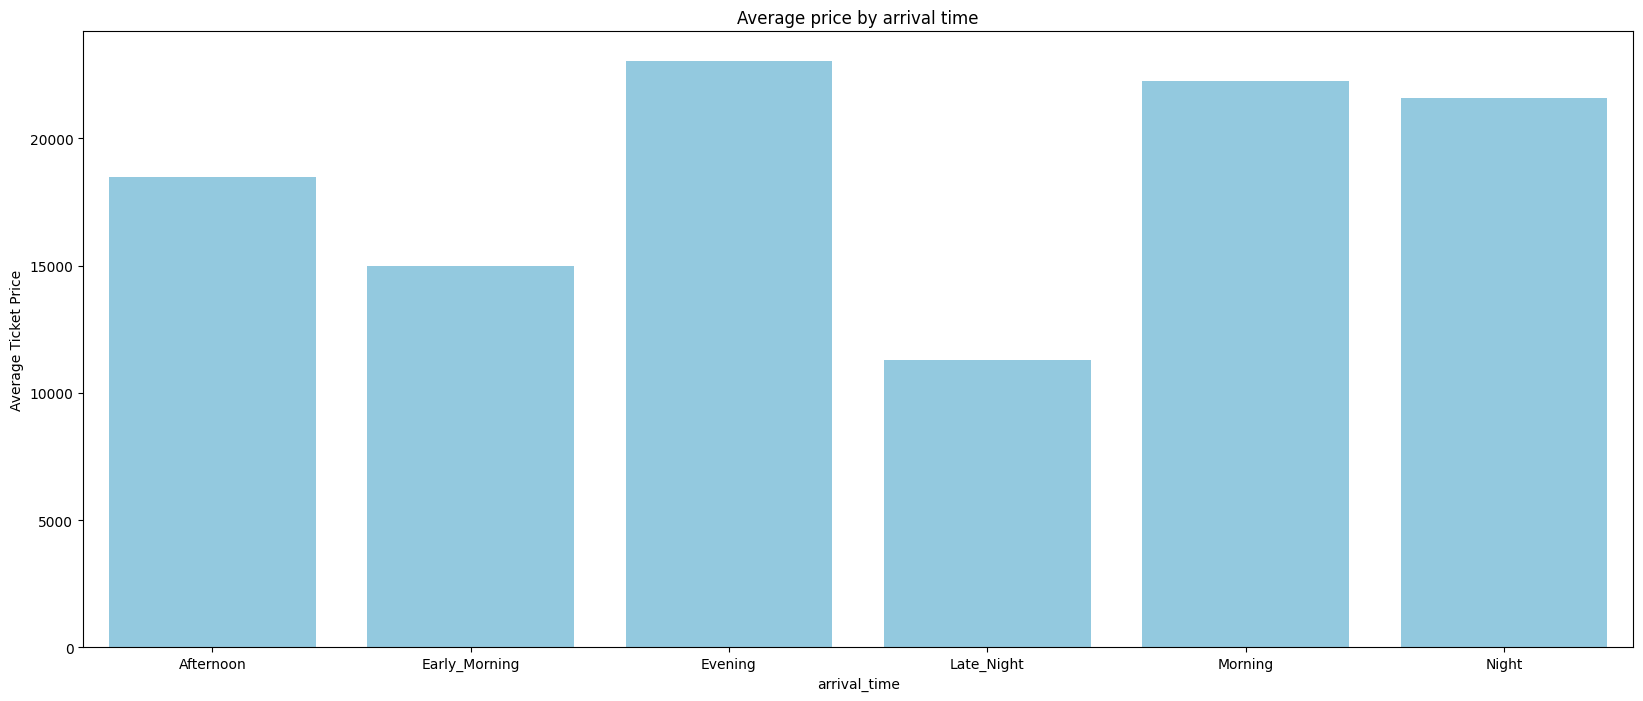

Figure(2000x800) AxesSubplot(0.125,0.11;0.775x0.77) Text(0.5, 24.140625000000007, 'arrival_time') Text(24.000000000000014, 0.5, 'Average Ticket Price') Text(0.5, 1.0, 'Average price by arrival time') None


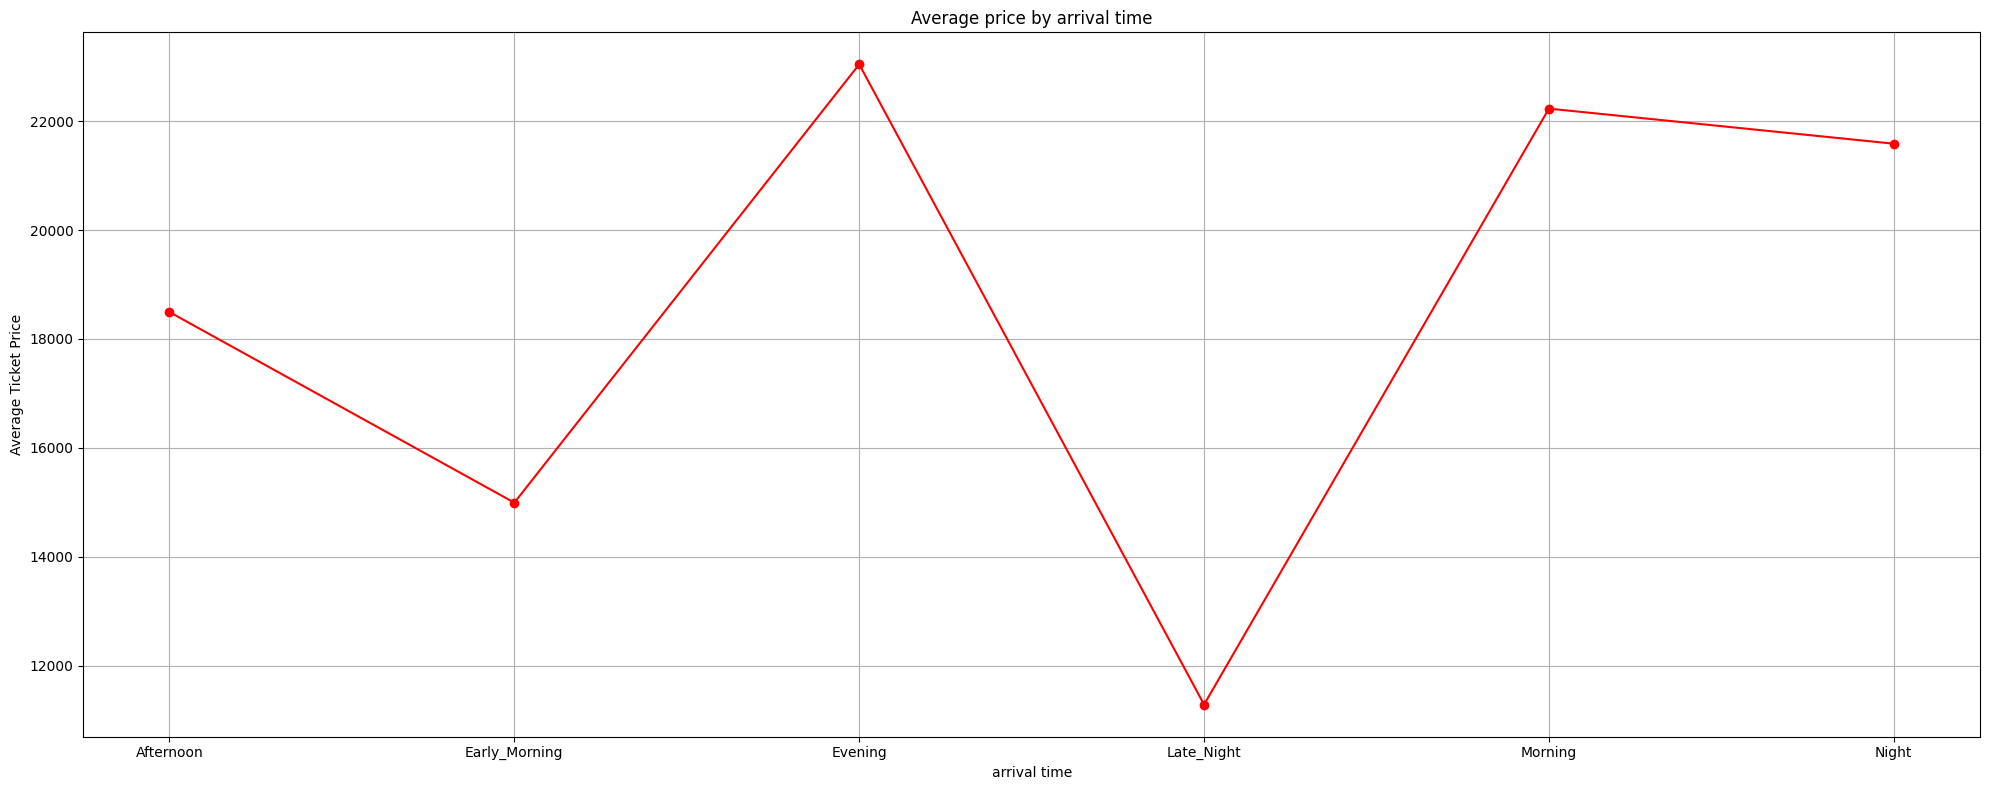

In [49]:
average_prices2 = df.groupby('arrival_time')['price'].mean().reset_index()

print(plt.figure(figsize=(20,8)),
      sns.barplot(x='arrival_time', y='price', data=average_prices2,color='#87CEEB'),
      plt.xlabel('arrival_time'),
      plt.ylabel('Average Ticket Price'),
      plt.title('Average price by arrival time'),
      plt.show())

plt.figure(figsize=(20,8))
plt.plot(average_prices2['arrival_time'], average_prices2['price'], marker='o', color='red')
plt.xlabel('arrival time')
plt.ylabel('Average Ticket Price')
plt.title('Average price by arrival time')
plt.grid(True)

plt.tight_layout()
plt.show()

In [50]:
average_prices2

,arrival_time,price
0,Afternoon,18494.598993
1,Early_Morning,14993.139521
2,Evening,23044.371615
3,Late_Night,11284.906078
4,Morning,22231.076098
5,Night,21586.758341


- Evening stands out as the most expensive, offering premium-priced services during peak hours.
- Morning closely follows as the second most costly option, while Night ranks third in terms of pricing. 
- Afternoon comes in as a mid-range choice, offering more budget-friendly rates compared to the top three.
- Early Morning and Late Night prove to be the most economical options, providing cost-effective solutions for those seeking affordable prices.

###### Q: How does the price change depending on the Source City?

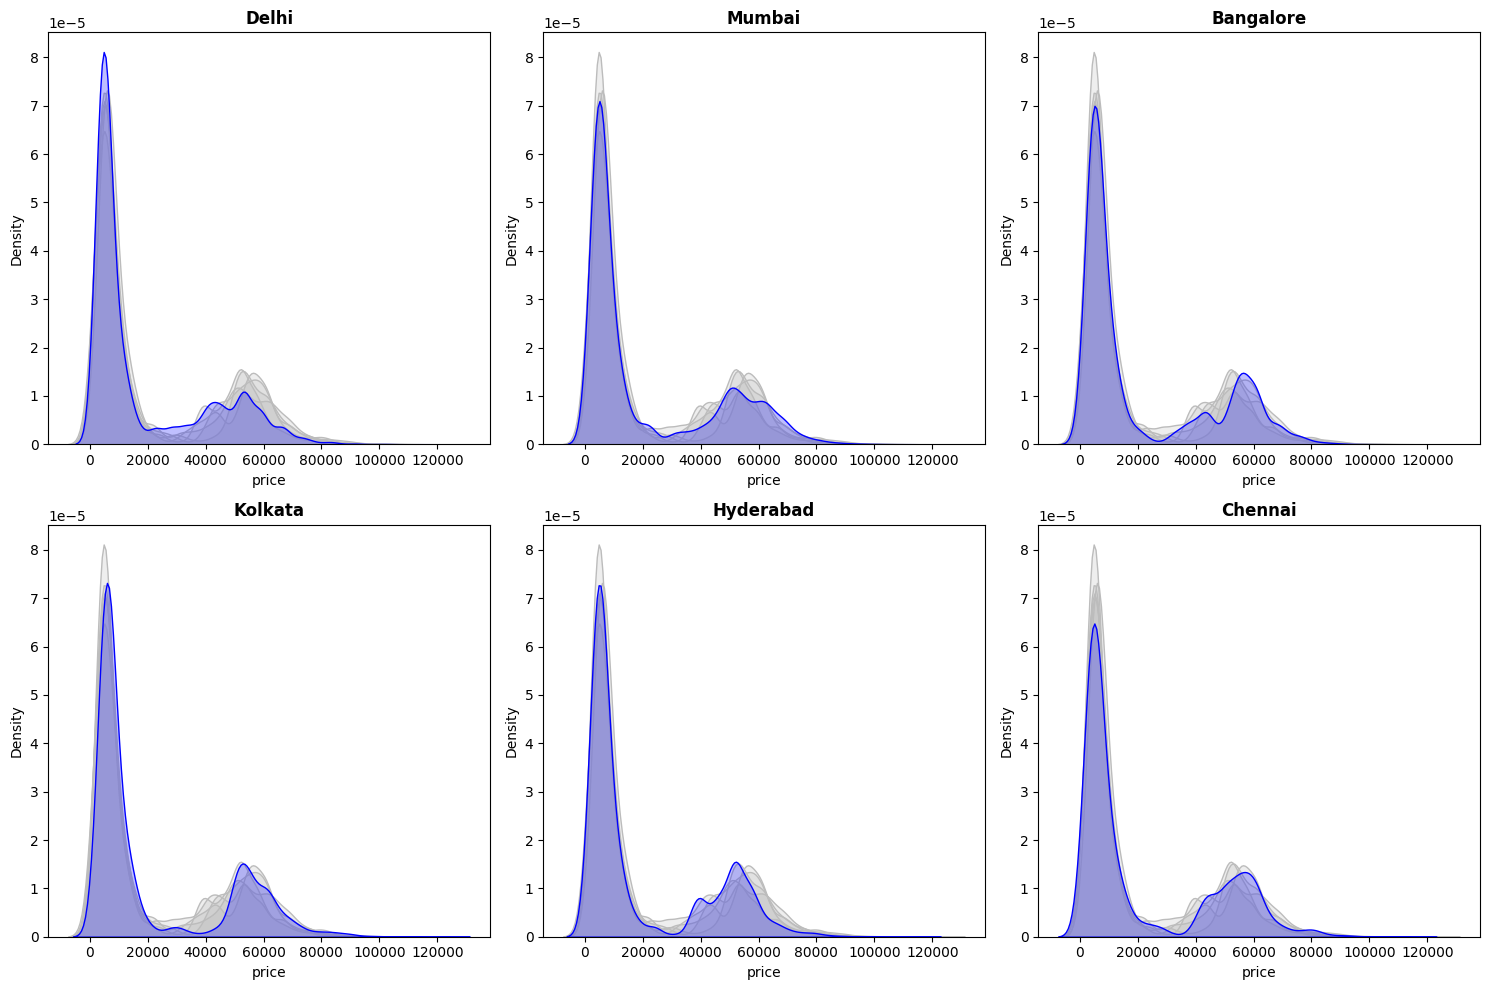

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
source_city_dict = {}

source_city = df['source_city'].unique()

for source_city_name in source_city:
    source_city_dict[source_city_name] = df[df['source_city'] == source_city_name]['price']

def price_airline(name, color, ax):
    source_city = df['source_city'].unique()
    
    for i in source_city:
        if str(i) != name:
            sns.kdeplot(source_city_dict[i], fill=True, color='#BCBCBC', ax=ax)
        
    sns.kdeplot(source_city_dict[name], fill=True, color=color, ax=ax)
    ax.set_title(name, fontweight='bold')

row = 0
col = 0
for source_city_name in source_city:
    price_airline(source_city_name, 'blue', axes[row, col])
    col += 1
    if col == 3:
        col = 0
        row += 1

plt.tight_layout()
plt.show()

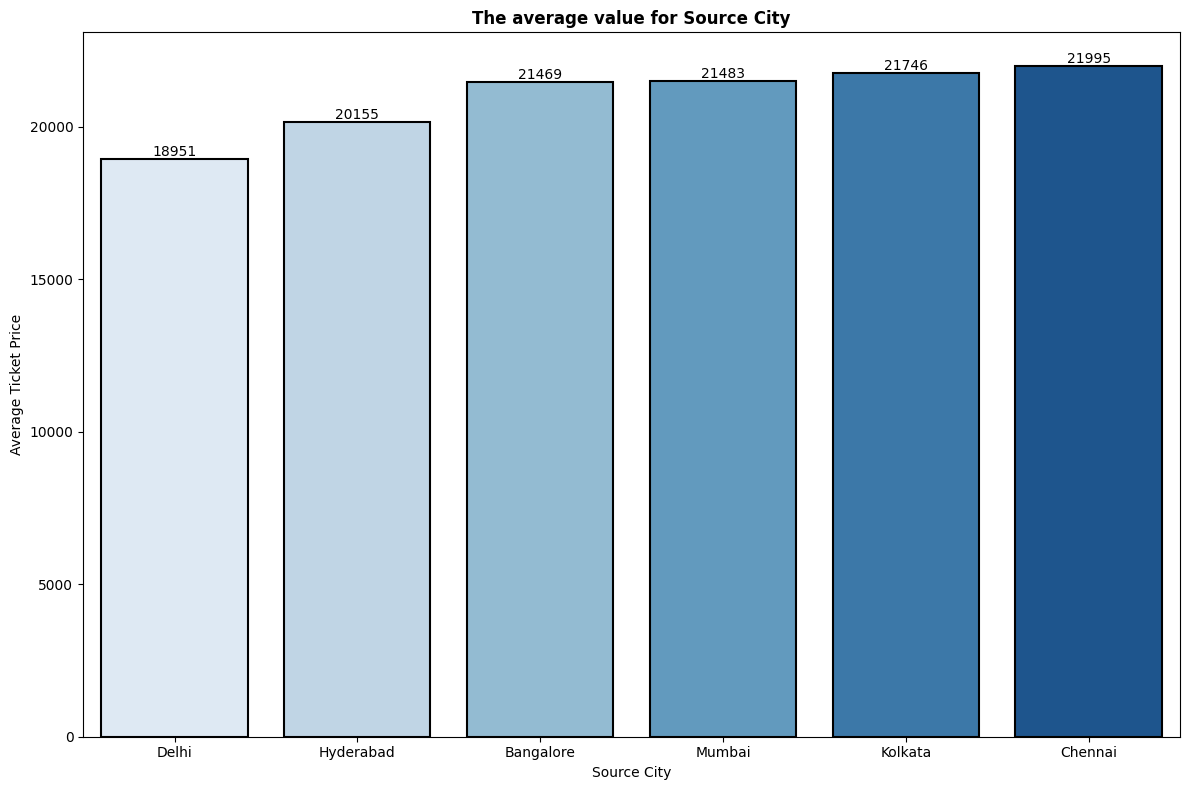

In [52]:
# Calculate the mean ticket price for each airline
airline_group = df.groupby('source_city')['price'].mean().reset_index()
airline_group['mean_price'] = airline_group['price'].astype(int)

airline_group = airline_group.sort_values(by='mean_price')

palette = sns.color_palette('Blues', n_colors=len(airline_group))

plt.figure(figsize=(12, 8))
p1 = sns.barplot(data=airline_group, x='source_city', y='mean_price', palette=palette, linewidth=1.5, edgecolor='black')
p1.bar_label(p1.containers[0])

plt.title('The average value for Source City', fontweight='bold')
plt.xlabel('Source City')
plt.ylabel('Average Ticket Price')

plt.tight_layout()

- Flight prices show a consistent distribution across different departure cities.
- There is a mix of cheap and expensive tickets, possibly due to imbalanced aircraft class offerings, with business class tickets being more expensive and standard/economy tickets being more affordable.
- Delphi offers the cheapest flight tickets among the listed departure cities.
- Chennai stands out as the city with the highest-priced flight tickets.
- Bangalore, Mumbai, Kolkata, and Chennai display a relatively even distribution of ticket prices between them.

##### Q: How does the ticket price change depending on the passenger class?

In [53]:
class_group = df.groupby('class')['price'].mean().reset_index()
class_group['mean_price'] = class_group['price'].astype(int)
class_group = class_group.sort_values(by='mean_price')
class_group

,class,price,mean_price
1,Economy,6572.342383,6572
0,Business,52540.081124,52540


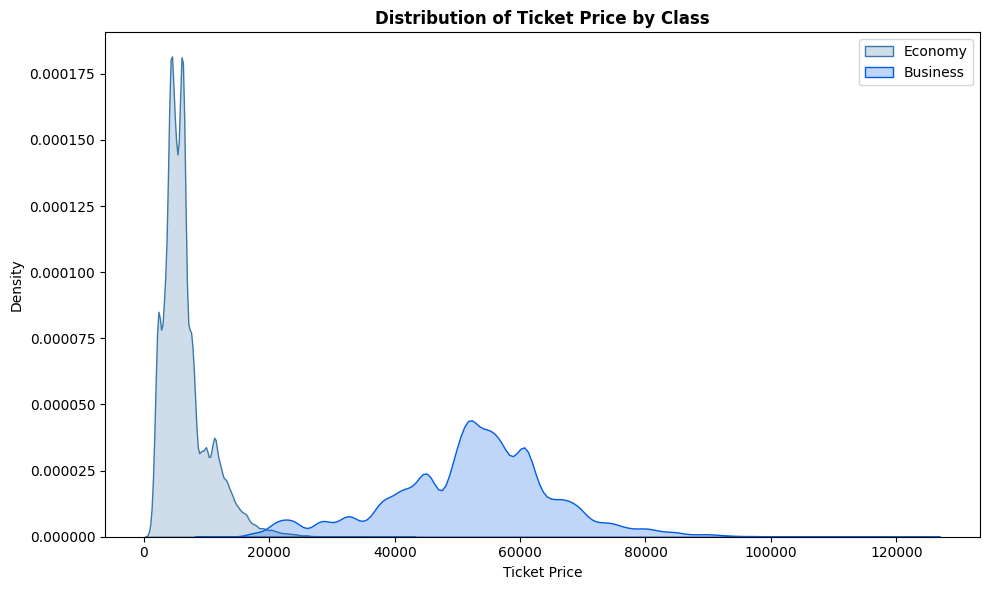

In [54]:
class_dict = {}
clas = df['class'].unique()

for class_name in clas:
    class_dict[class_name] = df[df['class'] == class_name]['price']

plt.figure(figsize=(10, 6))
sns.kdeplot(x=class_dict['Economy'], fill=True, label='Economy', color='#3C78A8')
sns.kdeplot(x=class_dict['Business'], fill=True, label='Business', color='#005CE6')

# Set plot title and labels
plt.title('Distribution of Ticket Price by Class', fontweight='bold')
plt.xlabel('Ticket Price')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

- Ticket prices strongly correlate with the passenger's class.
- Business class tickets have significantly higher prices compared to economy class tickets.
- Economy class tickets, on average, cost around 6579.
- In contrast, the average price for a business class ticket is substantially higher, around 52552.
- These findings highlight distinct price disparities between the two passenger classes, indicating their significant impact on ticket pricing.

###### Q: How does the ticket price change depending on Stops?

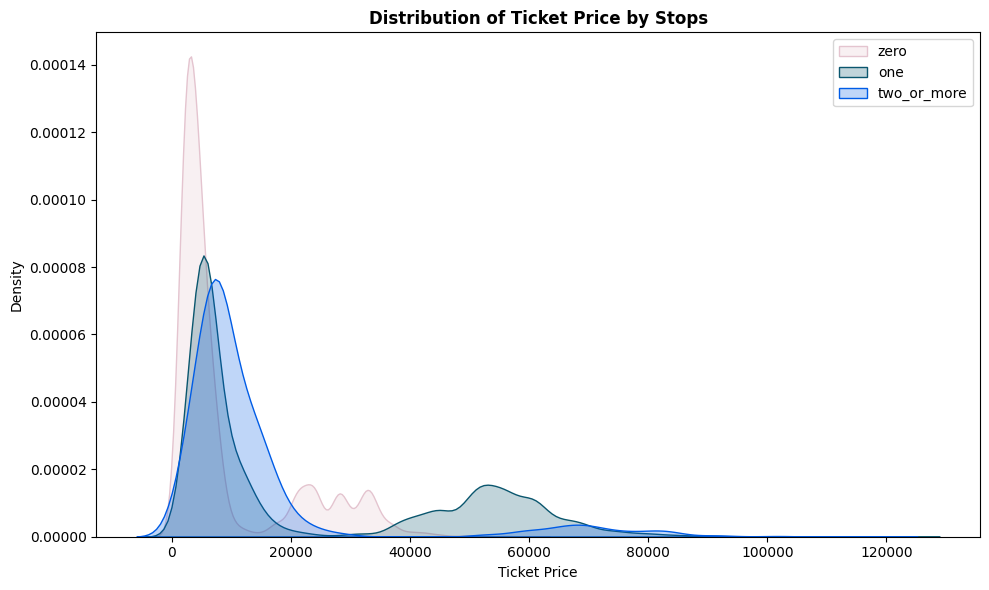

In [55]:
stops_dict = {}
stops = df['stops'].unique()

for stops_name in stops:
    stops_dict[stops_name] = df[df['stops'] == stops_name]['price']

num_stops = len(stops_dict)
sky_palette = sns.color_palette(['#E4C4CF', '#0A566E', '#005CE6'], n_colors=num_stops)

plt.figure(figsize=(10, 6))
for stops_name, color in zip(stops_dict.keys(), sky_palette):
    sns.kdeplot(x=stops_dict[stops_name], fill=True, label=stops_name, color=color)

plt.title('Distribution of Ticket Price by Stops', fontweight='bold')
plt.xlabel('Ticket Price')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

- Direct flights offer the cheapest tickets among all the options.
- Flights with one transfer have the most expensive tickets.
- For flights with more than two transfers, the tickets remain consistently affordable, even when compared to single-stop or non-stop flights.

## $Data$ $Preprocessing$

In [56]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [57]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destination
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai


In [58]:
df.duplicated().sum()

0

In [59]:
df.isnull().sum()

airline                  0
flight                   0
source_city              0
departure_time           0
stops                    0
arrival_time             0
destination_city         0
class                    0
duration                 0
days_left                0
price                    0
source_to_destination    0
dtype: int64

In [60]:
df.shape

(300153, 12)

In [61]:
df.drop('source_to_destination', axis = 1, inplace = True)

In [62]:
df.drop('flight',axis=1,inplace=True)

In [63]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [64]:
df.duplicated().sum()

2213

In [65]:
df=df.drop_duplicates()

In [66]:
df.shape

(297940, 10)

In [67]:
df["airline"] = lab_enc.fit_transform(df["airline"])
df["source_city"] = lab_enc.fit_transform(df["source_city"])
df["destination_city"] = lab_enc.fit_transform(df["destination_city"])
df["stops"] = lab_enc.fit_transform(df["stops"])
df["departure_time"] = lab_enc.fit_transform(df["departure_time"])
df["arrival_time"] = lab_enc.fit_transform(df["arrival_time"])
df["class"] = lab_enc.fit_transform(df["class"])
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


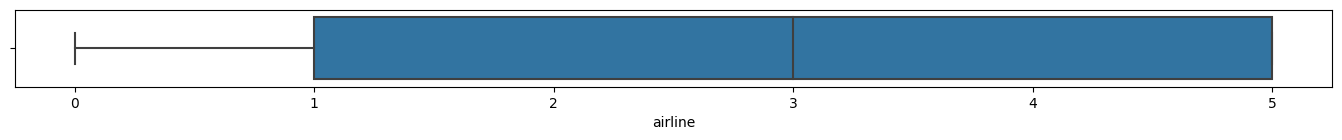

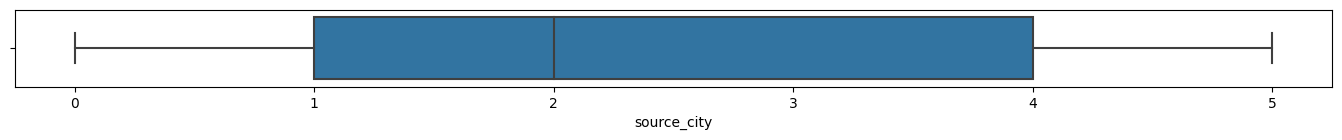

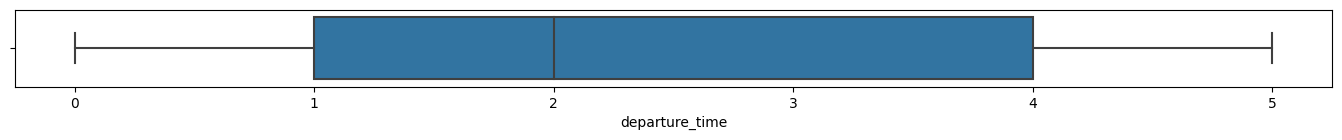

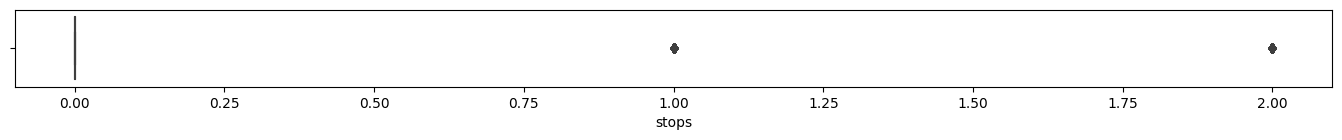

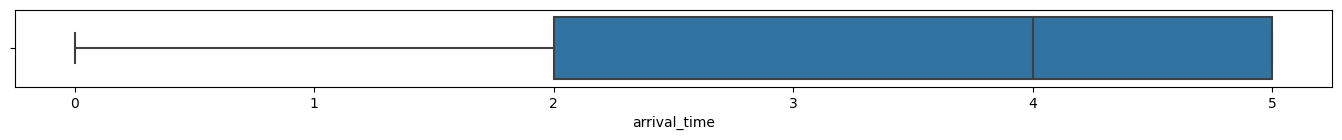

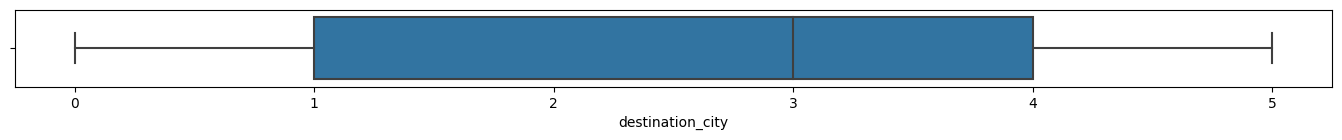

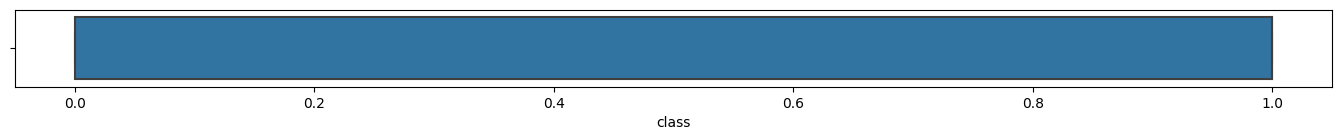

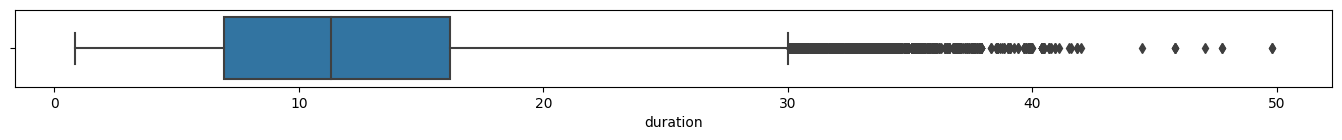

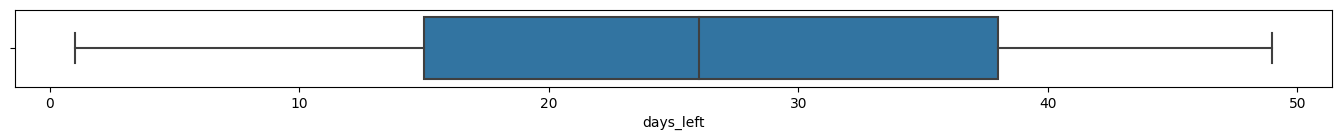

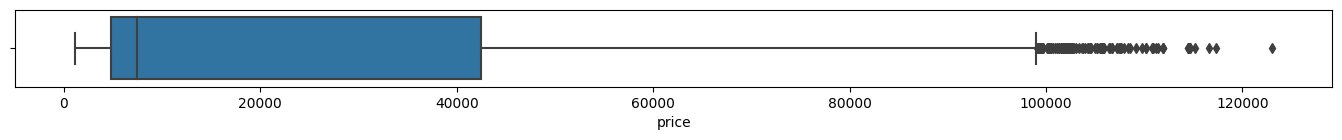

In [68]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

- Removal of Outliers - $'duration'$

Text(0.5, 1.0, 'Boxplot of duration after removing outliers')

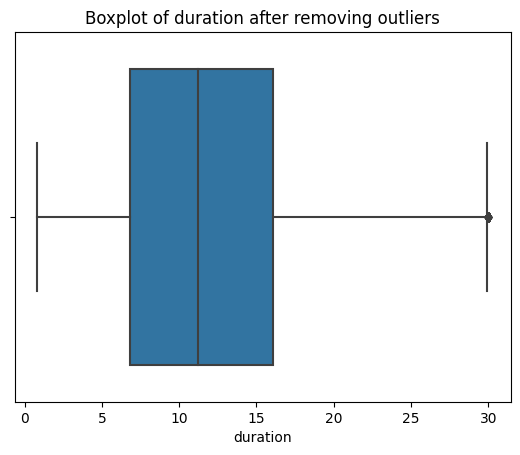

In [69]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3-Q1

df = df[df['duration'] >= Q1-1.5*(IQR)]
df = df[df['duration'] <= Q3+1.5*(IQR)]
sns.boxplot(x=df['duration'])
plt.title('Boxplot of duration after removing outliers')

In [70]:
df.shape

(295714, 10)

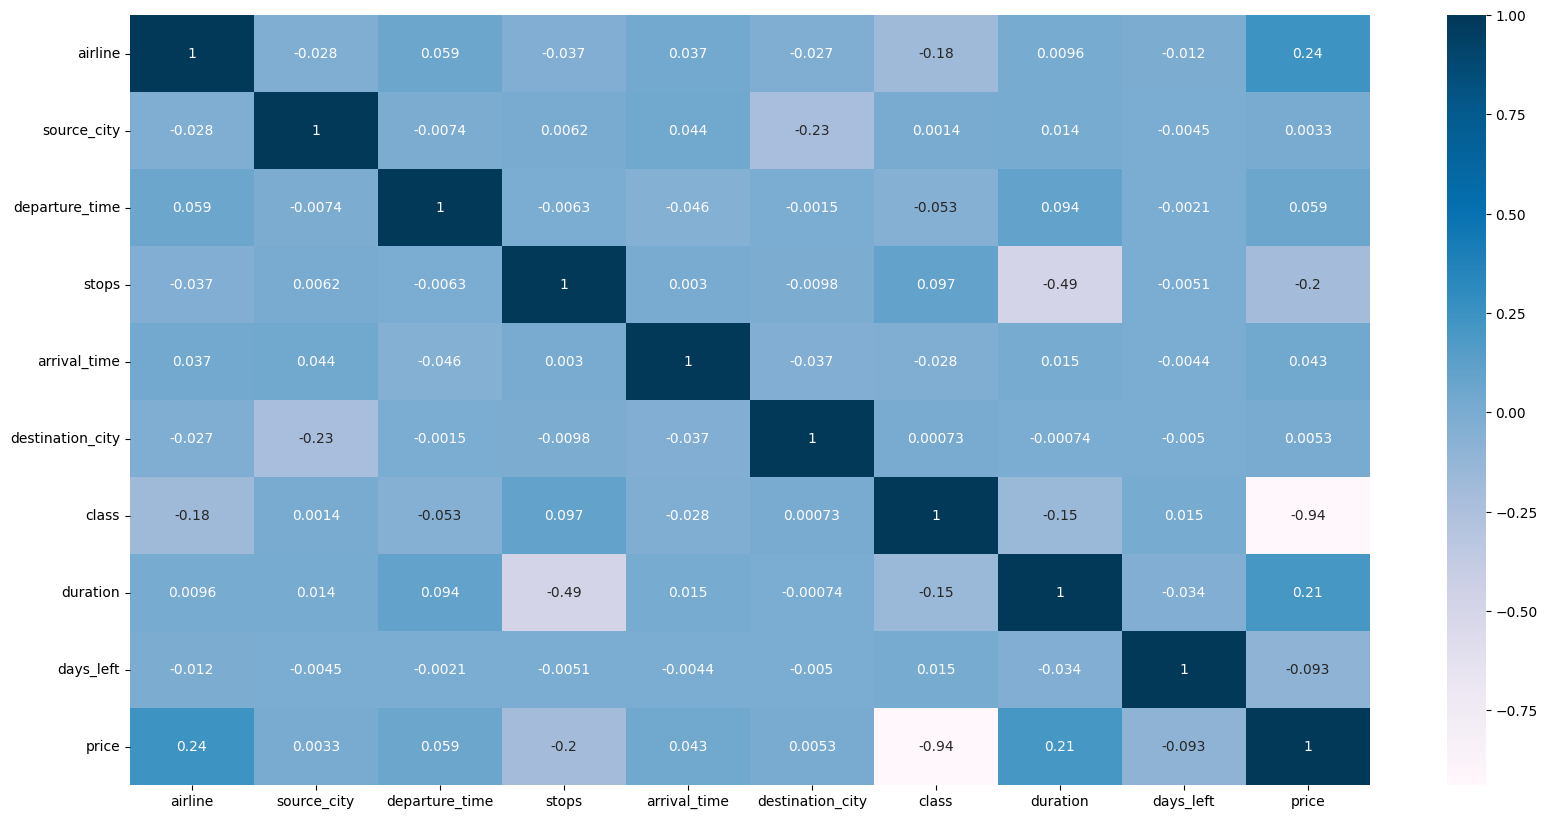

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

- There is relationship between class and price but this correlation matrix can't match the relationship between feature.

In [72]:
df.duplicated().sum()

0

In [73]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [74]:
df.shape

(295714, 10)

In [75]:
data = df.copy()

In [76]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


### $Check$ $For$ $Multicollinearity$

In [77]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [78]:
df2=data.drop(['price','source_city','destination_city'],axis=1)

In [79]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns

In [80]:
vif_data["VIF"] = [variance_inflation_factor(df2.values, i)
                          for i in range(len(df2.columns))]

In [81]:
print(vif_data)

          feature       VIF
0         airline  3.303714
1  departure_time  2.764279
2           stops  1.400780
3    arrival_time  3.537666
4           class  2.679718
5        duration  3.998503
6       days_left  3.817682


- There is no Multicollinearity in our dataset

### $Train$ $Test$ $Split$

##### Seperate Dependent and Independent Variables

In [82]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [83]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [84]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=36)

print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (221785, 9)
x_test shape: (73929, 9)
y_train shape: (221785,)
y_test shape: (73929,)


In [85]:
x_test_rows = x_test.shape[0]
x_test_cols = x_test.shape[1]

print(x_test.shape)
print(x_test_rows)
print(x_test_cols)

(73929, 9)
73929
9


#### $Function$ $of$ $Measure$ $Performance$

In [86]:
def function(func, y_pred_all, model_name):
    score = round((func.score(x_test, y_test)*100), 2)
    mse = round(mean_squared_error(y_test, y_pred_all), 3)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_all)), 3)
    r2 = round(r2_score(y_test, y_pred_all), 3)
    adjusted_r2 = 1-(1-r2)*(x_test_rows-x_test_cols)/(x_test_rows-x_test_cols-1)
    mae = mean_absolute_error(y_test, y_pred_all)

    metrics = pd.DataFrame({
        'Model Name': model_name,
        'Accuracy(%)': [score],
        'Mean Squared Error (MSE)': [mse],
        'Root Mean Squared Error (RMSE)': [rmse],
        'R-squared (R2-Score)': [r2],
        'Adjusted R-Squared': [adjusted_r2],
        'Mean Absolute Error (MAE)': [mae]
    })
    return metrics

### $Model$ $Building$

### $Linear$ $Regression$

In [87]:
lin = LinearRegression()

In [88]:
linear_reg=lin.fit(x_train, y_train)

In [89]:
y_pred_train=lin.predict(x_train)

In [90]:
y_pred_lin = lin.predict(x_test)

#### $Residual$ $Analysis$

- From the above plot we can see that, most of the residuals from the training data is fitted in a straight line, hence we can conclude our residuals follow a normal distribution.

### $Model$ $Evaluation$

In [91]:
function(lin, y_pred_lin, 'Linear Regression')

,Model Name,Accuracy(%),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2-Score),Adjusted R-Squared,Mean Absolute Error (MAE)
0,Linear Regression,90.51,49236832.37,7016.896,0.905,0.904999,4651.82126


In [92]:
print(f'MSE: {mean_squared_error(y_test,y_pred_lin)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_lin)}')

MSE: 49236832.37008418
MAE: 4651.821260186332


In [93]:
print(f'Training R2 Score :{r2_score(y_train,y_pred_train)}')

Training R2 Score :0.9047183877994409


##### We got a value for R-squared which is 0.9049 , which means the independent variables are able to expalin 90.49% of  variance in the dependent variable.

In [94]:
print(f'Testing R2 Score : {r2_score(y_test,y_pred_lin)}')

Testing R2 Score : 0.9051349709538274


##### The model performs well on the test data as well giving an R-squared of 0.9041, which indicates the model generated is a good model and can be used for predicting the Price of Flights

### $Let$ $us$ $create$ $the$ $Linear$ $Regression$ $model$ $equation$ $and$ $store$ $it$ $in$ $a$ $string$

In [95]:
# Print coef
print("Coef are:", linear_reg.coef_)

#print intercept
print("Intercept is", linear_reg.intercept_)

Coef are: [ 9.50689863e+02  1.03181287e+02  4.20322133e+01 -3.36799926e+03
  1.94272178e+02  1.16564161e+02 -4.46442392e+04  7.57011844e+01
 -1.31411136e+02]
Intercept is 50835.29134974789


In [96]:
model = str(linear_reg.intercept_)

for i in range(len(linear_reg.coef_)):
    model = model +' + '  +(str(linear_reg.coef_[i])) + ' * ' +(str(x_train.columns[i]))
print(model)

50835.29134974789 + 950.6898628669201 * airline + 103.18128704828268 * source_city + 42.03221325250615 * departure_time + -3367.9992610651407 * stops + 194.27217784702316 * arrival_time + 116.56416118787456 * destination_city + -44644.239169543725 * class + 75.70118440949545 * duration + -131.4111358825412 * days_left


### $Decision$ $Tree$ $Regression$

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
dt = DecisionTreeRegressor(random_state=32)
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=32)

In [99]:
y_pred_train_dt = dt.predict(x_train)
y_pred_dt = dt.predict(x_test)

In [100]:
print(f'Training R2 Score_dt :{r2_score(y_train,y_pred_train_dt)}')

Training R2 Score_dt :0.999354711778777


In [101]:
print(f'Testing R2 Score_dt : {r2_score(y_test,y_pred_dt)}')

Testing R2 Score_dt : 0.975898684008534


In [102]:
function(dt, y_pred_dt, 'Decision Tree Regression')

,Model Name,Accuracy(%),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2-Score),Adjusted R-Squared,Mean Absolute Error (MAE)
0,Decision Tree Regression,97.59,1.250906e+07,3536.815,0.976,0.976,1189.214068


### $Random$ $Forest$ $Regression$

In [103]:
from sklearn.ensemble import RandomForestRegressor 

#from sklearn.inspection import permutation_importance

In [104]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [105]:
y_pred_rfr = rfr.predict(x_test)

In [106]:
y_pred_train_rfr=rfr.predict(x_train)

In [107]:
print(f'Training R2 Score_rfr :{r2_score(y_train,y_pred_train_rfr)}')

Training R2 Score_rfr :0.9975003707695251


In [108]:
print(f'Testing R2 Score_rfr : {r2_score(y_test,y_pred_rfr)}')

Testing R2 Score_rfr : 0.9850434350799814


In [109]:
function(rfr, y_pred_rfr, 'Random Forest Regression')

,Model Name,Accuracy(%),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2-Score),Adjusted R-Squared,Mean Absolute Error (MAE)
0,Random Forest Regression,98.5,7762753.959,2786.172,0.985,0.985,1109.290931


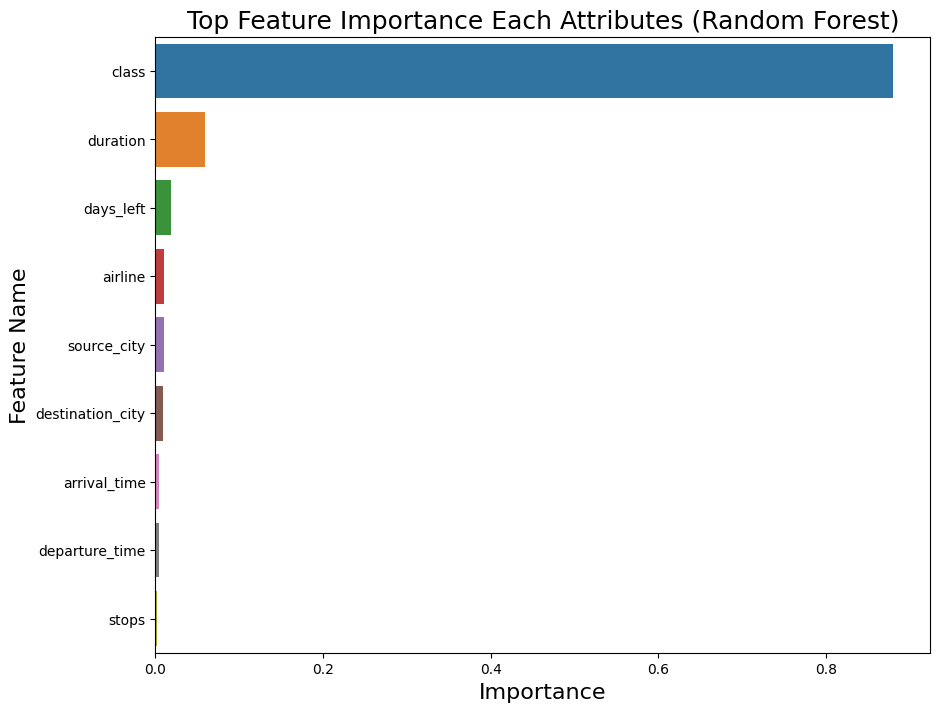

In [110]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": rfr.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

### <center><font face=' bold'> $The End$</font></center>